In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

from IPython.display import SVG, display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split

from keras import models
from keras import layers
from keras import regularizers
from keras.utils.vis_utils import model_to_dot
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint


%matplotlib inline

original = pd.read_csv('cardio.csv')
original

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
print('Missing values:')
original.isnull().sum()

Missing values:


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
print('Basic info:')
original.info()

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
print('All-in-one statistics:')
original.describe(include='all')

All-in-one statistics:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print('Column\'s means:')
original.mean()

Column's means:


id             49972.419900
age            19468.865814
gender             1.349571
height           164.359229
weight            74.205690
ap_hi            128.817286
ap_lo             96.630414
cholesterol        1.366871
gluc               1.226457
smoke              0.088129
alco               0.053771
active             0.803729
cardio             0.499700
dtype: float64

In [8]:
print('Column\'s medians:)')
original.median()

Column's medians:)


id             50001.5
age            19703.0
gender             1.0
height           165.0
weight            72.0
ap_hi            120.0
ap_lo             80.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
cardio             0.0
dtype: float64

In [9]:
print('Column\'s ranges (max - min):')
original.max() - original.min()

Column's ranges (max - min):


id             99999.0
age            12915.0
gender             1.0
height           195.0
weight           190.0
ap_hi          16170.0
ap_lo          11070.0
cholesterol        2.0
gluc               2.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
dtype: float64

In [10]:
print('Column\'s standard deviations:')
original.std()

Column's standard deviations:


id             28851.302323
age             2467.251667
gender             0.476838
height             8.210126
weight            14.395757
ap_hi            154.011419
ap_lo            188.472530
cholesterol        0.680250
gluc               0.572270
smoke              0.283484
alco               0.225568
active             0.397179
cardio             0.500003
dtype: float64

In [11]:
print('Column\'s variances:')
original.var()

Column's variances:


id             8.323976e+08
age            6.087331e+06
gender         2.273745e-01
height         6.740617e+01
weight         2.072378e+02
ap_hi          2.371952e+04
ap_lo          3.552189e+04
cholesterol    4.627405e-01
gluc           3.274933e-01
smoke          8.036307e-02
alco           5.088079e-02
active         1.577512e-01
cardio         2.500035e-01
dtype: float64

Triangle matrix correlation for target Cardio: (highest - age, weight, cholesterol)


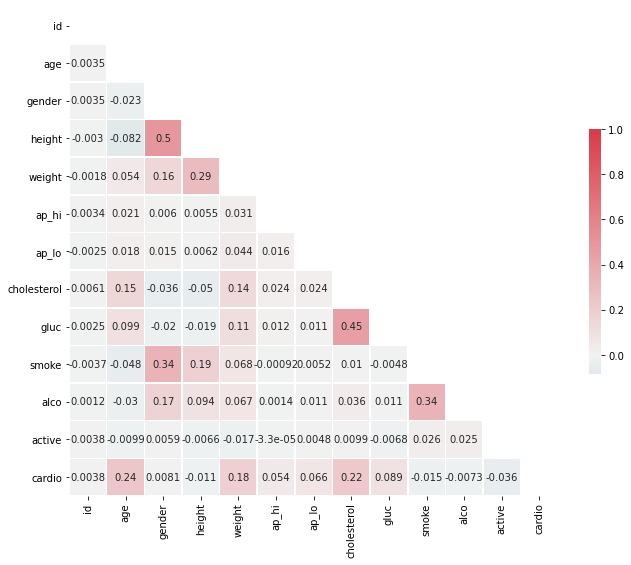

In [12]:
def plot_corr(df):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    
print('Triangle matrix correlation for target Cardio: (highest - age, weight, cholesterol)')    
plot_corr(original)

In [13]:
dataframe = original.copy()
dataframe.drop(['id'], axis=1, inplace=True)
dataframe.weight = dataframe.weight.astype('int64')

dataframe.drop(dataframe[dataframe['ap_hi'] < 60].index, inplace = True)
dataframe.drop(dataframe[dataframe['ap_hi'] > 240].index, inplace = True)
dataframe.drop(dataframe[dataframe['ap_lo'] < 40].index, inplace = True)
dataframe.drop(dataframe[dataframe['ap_lo'] > 190].index, inplace = True)

dataframe

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76,120,80,1,1,1,0,1,0
69996,22601,1,158,126,140,90,2,2,0,0,1,1
69997,19066,2,183,105,180,90,3,1,0,1,0,1
69998,22431,1,163,72,135,80,1,2,0,0,0,1


In [14]:
print('All-in-one statistics:')
dataframe.describe(include='all')

All-in-one statistics:


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000
mean,19464.475042,1.348731,164.361410,74.120872,126.614846,81.382043,1.364740,1.226012,0.088012,0.053639,0.803373,0.494904
std,2468.134043,0.476572,8.185149,14.331441,16.763475,9.676889,0.678999,0.571989,0.283314,0.225305,0.397451,0.499978
min,10798.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68775 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          68775 non-null  int64
 1   gender       68775 non-null  int64
 2   height       68775 non-null  int64
 3   weight       68775 non-null  int64
 4   ap_hi        68775 non-null  int64
 5   ap_lo        68775 non-null  int64
 6   cholesterol  68775 non-null  int64
 7   gluc         68775 non-null  int64
 8   smoke        68775 non-null  int64
 9   alco         68775 non-null  int64
 10  active       68775 non-null  int64
 11  cardio       68775 non-null  int64
dtypes: int64(12)
memory usage: 6.8 MB


<AxesSubplot:xlabel='cardio', ylabel='count'>

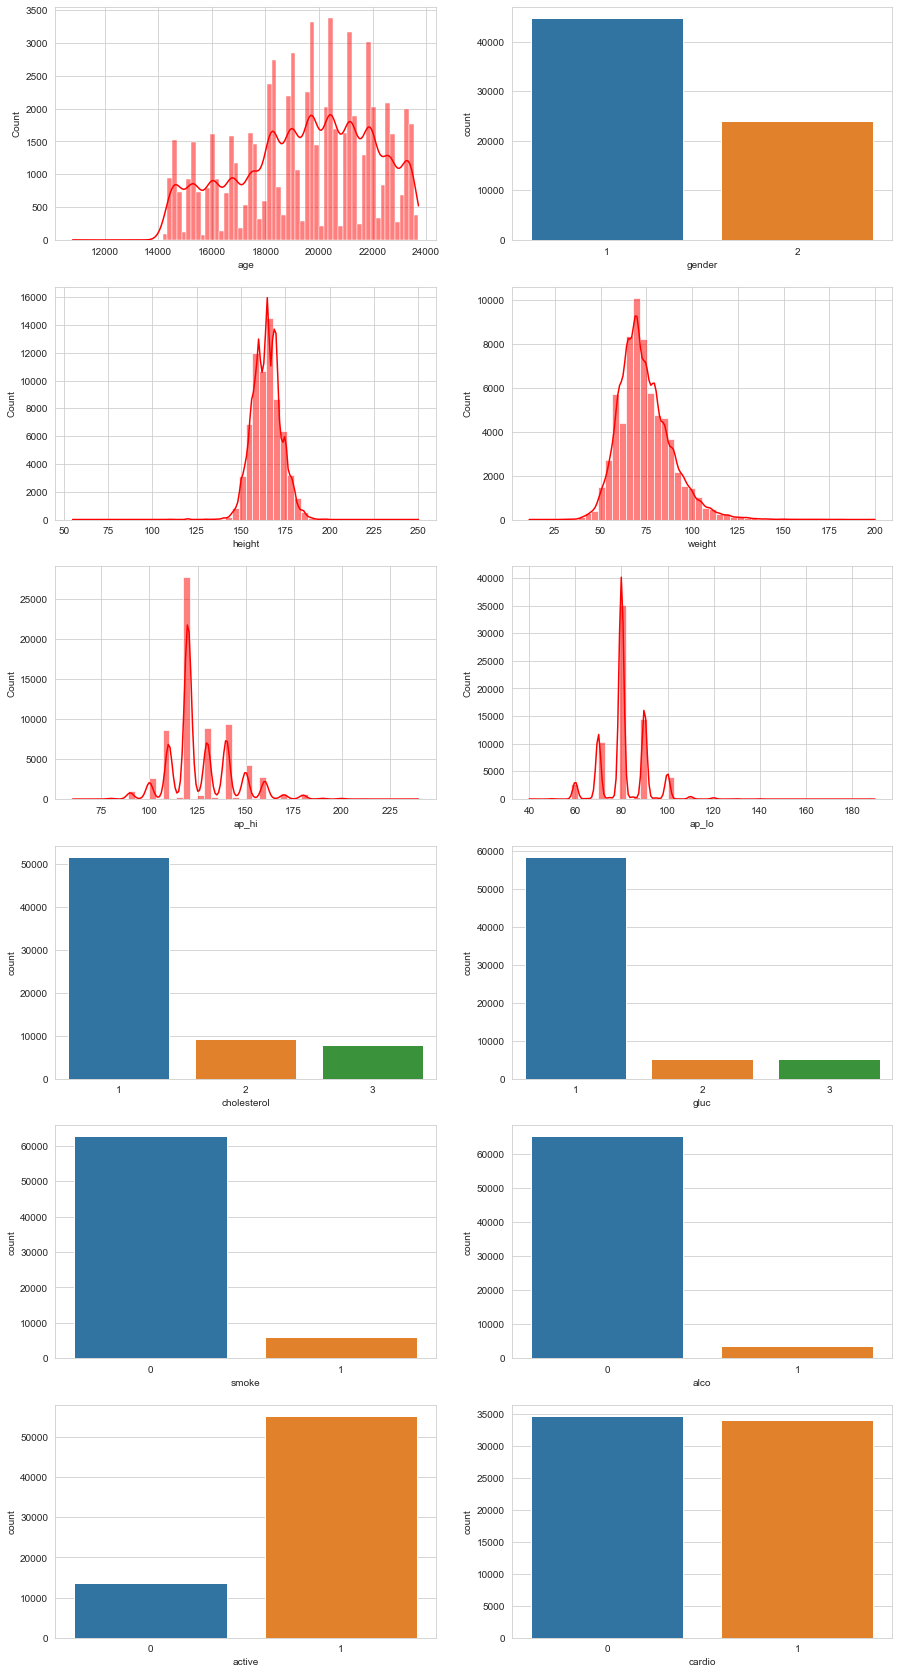

In [16]:
sns.set_style('whitegrid')
fig1, axs1 = plt.subplots(6, 2, figsize=(15, 30), num='Stats visualized')

sns.histplot(x=dataframe['age'], ax=axs1[0,0], color='red', kde=True)  # 
sns.countplot(x=dataframe['gender'], ax=axs1[0,1])
sns.histplot(x=dataframe['height'], ax=axs1[1,0], color='red', bins=50, kde=True)  #
sns.histplot(x=dataframe['weight'], ax=axs1[1,1], color='red', bins=50, kde=True)  #
sns.histplot(x=dataframe['ap_hi'], ax=axs1[2,0], color='red', bins=50, kde=True)  #
sns.histplot(x=dataframe['ap_lo'], ax=axs1[2,1], color='red', bins=50, kde=True)  #
sns.countplot(x=dataframe['cholesterol'], ax=axs1[3,0])
sns.countplot(x=dataframe['gluc'], ax=axs1[3,1])
sns.countplot(x=dataframe['smoke'], ax=axs1[4,0])
sns.countplot(x=dataframe['alco'], ax=axs1[4,1])
sns.countplot(x=dataframe['active'], ax=axs1[5,0])
sns.countplot(x=dataframe['cardio'], ax=axs1[5,1])

## Artificial Neural Networks

### Base Model

In [17]:
scaler = StandardScaler()
x = dataframe.drop(columns=['cardio'])
y = dataframe['cardio']

x_std = scaler.fit_transform(x)
print(f'X standardized:\n {x_std}')

X standardized:
 [[-0.43412668  1.36657846  0.44453876 ... -0.31065288 -0.23807321
   0.49472348]
 [ 0.30935537 -0.73175454 -1.0215417  ... -0.31065288 -0.23807321
   0.49472348]
 [-0.24612904 -0.73175454  0.07801864 ... -0.31065288 -0.23807321
  -2.02133119]
 ...
 [-0.16144907  1.36657846  2.27713933 ... -0.31065288  4.20038852
  -2.02133119]
 [ 1.20193898 -0.73175454 -0.1663281  ... -0.31065288 -0.23807321
  -2.02133119]
 [ 0.43576757 -0.73175454  0.6888855  ... -0.31065288 -0.23807321
   0.49472348]]


In [18]:
y = dataframe['cardio']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
def create_network():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=6, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))

    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return network

network_base = create_network()
history_base = network_base.fit(x_train, y_train, epochs=10, verbose=1, batch_size=100,
                      validation_data=(x_test, y_test))

Epoch 1/10
551/551 [==============================] - 1s 969us/step - loss: 86.8943 - accuracy: 0.4963 - val_loss: 4.2794 - val_accuracy: 0.4953
Epoch 2/10
551/551 [==============================] - 0s 786us/step - loss: 2.2366 - accuracy: 0.5149 - val_loss: 1.4550 - val_accuracy: 0.5077
Epoch 3/10
551/551 [==============================] - 0s 760us/step - loss: 1.9283 - accuracy: 0.5251 - val_loss: 1.7802 - val_accuracy: 0.5077
Epoch 4/10
551/551 [==============================] - 0s 762us/step - loss: 1.5654 - accuracy: 0.5513 - val_loss: 1.0250 - val_accuracy: 0.6092
Epoch 5/10
551/551 [==============================] - 0s 757us/step - loss: 1.7416 - accuracy: 0.5603 - val_loss: 1.6713 - val_accuracy: 0.5135
Epoch 6/10
551/551 [==============================] - 0s 757us/step - loss: 1.9668 - accuracy: 0.5504 - val_loss: 0.9601 - val_accuracy: 0.5755
Epoch 7/10
551/551 [==============================] - 1s 907us/step - loss: 1.4473 - accuracy: 0.5793 - val_loss: 0.7853 - val_accuracy

In [18]:
def predict(network):
    y_pred = (network.predict(x_test) > 0.5).astype('int32')
    print(f'Total of {len(y_pred)} predictions.')
    correct = 0
    y_show = y_test.to_numpy()
    for i in range(len(y_pred)):
    #     print(f'{i}. Predicted: {y_pred[i]}, Expected: [{y_show[i]}]')
        if (y_pred[i] == y_show[i]):
            correct += 1
    print(f'Correct predictions: {correct} / {len(y_pred)} ({correct/len(y_pred)*100}%)\n')
    for i in range(20):
        j = random.randint(0, 13755)
        print(f'{j}. Predicted: {y_pred[j]}, Expected: [{y_show[j]}]')

predict(network_base)

Total of 13755 predictions.
Correct predictions: 8464 / 13755 (61.533987640857866%)

2746. Predicted: [1], Expected: [1]
9842. Predicted: [0], Expected: [0]
997. Predicted: [1], Expected: [0]
13385. Predicted: [1], Expected: [0]
3400. Predicted: [0], Expected: [1]
547. Predicted: [1], Expected: [0]
1043. Predicted: [1], Expected: [1]
9499. Predicted: [1], Expected: [1]
8565. Predicted: [1], Expected: [0]
3864. Predicted: [1], Expected: [1]
6724. Predicted: [1], Expected: [1]
1860. Predicted: [1], Expected: [1]
3927. Predicted: [1], Expected: [1]
1275. Predicted: [1], Expected: [1]
6321. Predicted: [0], Expected: [0]
6731. Predicted: [0], Expected: [1]
6347. Predicted: [1], Expected: [1]
9539. Predicted: [0], Expected: [0]
6443. Predicted: [1], Expected: [1]
1449. Predicted: [1], Expected: [1]


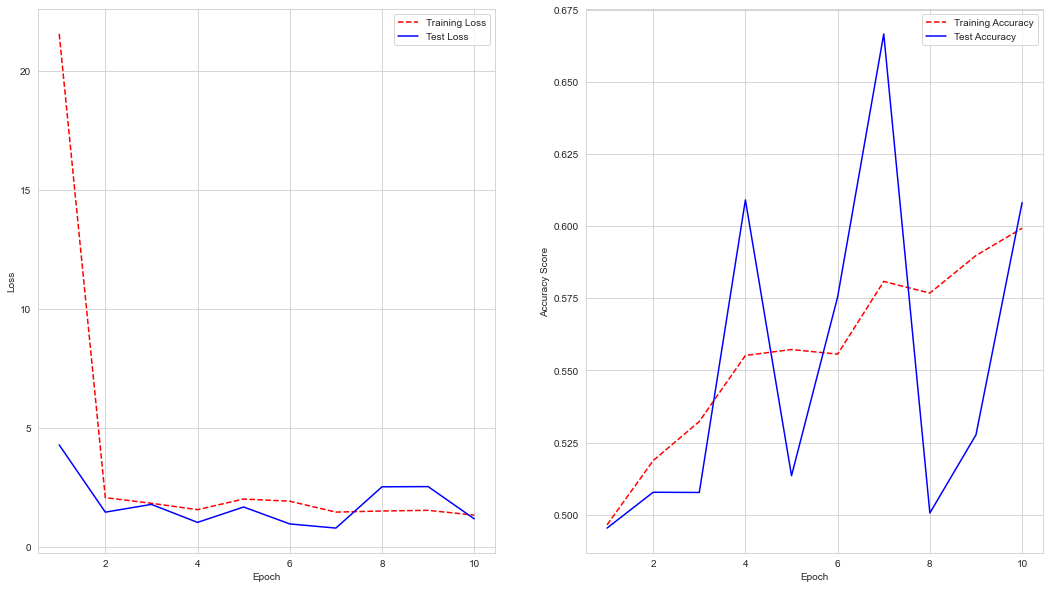

In [24]:
def show_loss_acc(history):
    training_loss = history.history["loss"]
    test_loss = history.history["val_loss"]
    training_accuracy = history.history["accuracy"]
    test_accuracy = history.history["val_accuracy"]

    epoch_count = range(1, len(training_loss) + 1)

    fig1, axs1 = plt.subplots(1, 2, figsize=(18, 10), num='Loss and Accuracy')

    axs1[0].plot(epoch_count, training_loss, "r--")
    axs1[0].plot(epoch_count, test_loss, "b-")
    axs1[0].legend(["Training Loss", "Test Loss"])
    axs1[0].set_xlabel("Epoch")
    axs1[0].set_ylabel("Loss")

    axs1[1].plot(epoch_count, training_accuracy, "r--")
    axs1[1].plot(epoch_count, test_accuracy, "b-")
    axs1[1].legend(["Training Accuracy", "Test Accuracy"])
    axs1[1].set_xlabel("Epoch")
    axs1[1].set_ylabel("Accuracy Score")
    
show_loss_acc(history_base)

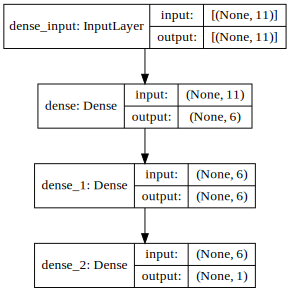

In [20]:
SVG(model_to_dot(network_base, show_shapes=True, dpi=69).create(prog="dot", format="svg"))

### Small batch

In [21]:
network_base = create_network()
history_base_small = network_base.fit(x_train, y_train, epochs=10, verbose=1, batch_size=10,
                      validation_data=(x_test, y_test))

Epoch 1/10
5502/5502 [==============================] - 4s 743us/step - loss: 164.7323 - accuracy: 0.5003 - val_loss: 3.5769 - val_accuracy: 0.5141
Epoch 2/10
5502/5502 [==============================] - 4s 715us/step - loss: 1.7465 - accuracy: 0.5478 - val_loss: 1.8055 - val_accuracy: 0.5264
Epoch 3/10
5502/5502 [==============================] - 4s 713us/step - loss: 1.5006 - accuracy: 0.5840 - val_loss: 0.7048 - val_accuracy: 0.6710
Epoch 4/10
5502/5502 [==============================] - 4s 719us/step - loss: 1.3410 - accuracy: 0.5994 - val_loss: 0.6645 - val_accuracy: 0.7003
Epoch 5/10
5502/5502 [==============================] - 4s 718us/step - loss: 1.4669 - accuracy: 0.6013 - val_loss: 0.7156 - val_accuracy: 0.6787
Epoch 6/10
5502/5502 [==============================] - 4s 735us/step - loss: 1.3299 - accuracy: 0.6020 - val_loss: 1.1752 - val_accuracy: 0.5634
Epoch 7/10
5502/5502 [==============================] - 4s 723us/step - loss: 1.2718 - accuracy: 0.6138 - val_loss: 0.7331

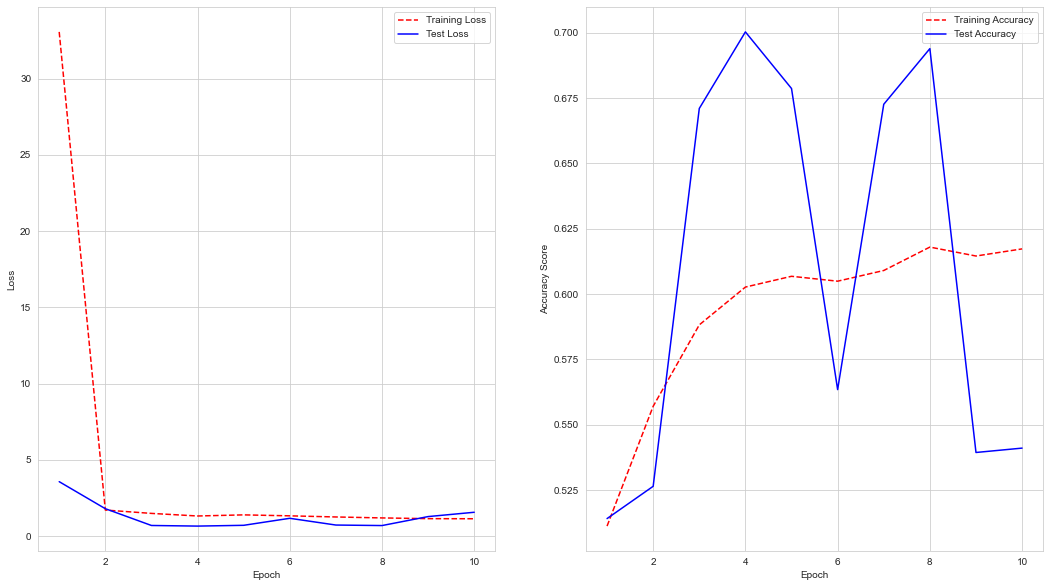

In [22]:
show_loss_acc(history_base_small)

### Big batch

In [23]:
network_base = create_network()
history_base_big = network_base.fit(x_train, y_train, epochs=10, verbose=1, batch_size=1000,
                      validation_data=(x_test, y_test))

Epoch 1/10
56/56 [==============================] - 1s 4ms/step - loss: 2150.9091 - accuracy: 0.5012 - val_loss: 1438.5343 - val_accuracy: 0.5137
Epoch 2/10
56/56 [==============================] - 0s 2ms/step - loss: 1310.5717 - accuracy: 0.5025 - val_loss: 888.0975 - val_accuracy: 0.5137
Epoch 3/10
56/56 [==============================] - 0s 2ms/step - loss: 813.1506 - accuracy: 0.5018 - val_loss: 558.7659 - val_accuracy: 0.5137
Epoch 4/10
56/56 [==============================] - 0s 2ms/step - loss: 511.2755 - accuracy: 0.5049 - val_loss: 354.9370 - val_accuracy: 0.5137
Epoch 5/10
56/56 [==============================] - 0s 2ms/step - loss: 322.4672 - accuracy: 0.5052 - val_loss: 223.8856 - val_accuracy: 0.5137
Epoch 6/10
56/56 [==============================] - 0s 2ms/step - loss: 196.2762 - accuracy: 0.5047 - val_loss: 60.4337 - val_accuracy: 0.5137
Epoch 7/10
56/56 [==============================] - 0s 2ms/step - loss: 25.8581 - accuracy: 0.5012 - val_loss: 1.2825 - val_accuracy: 

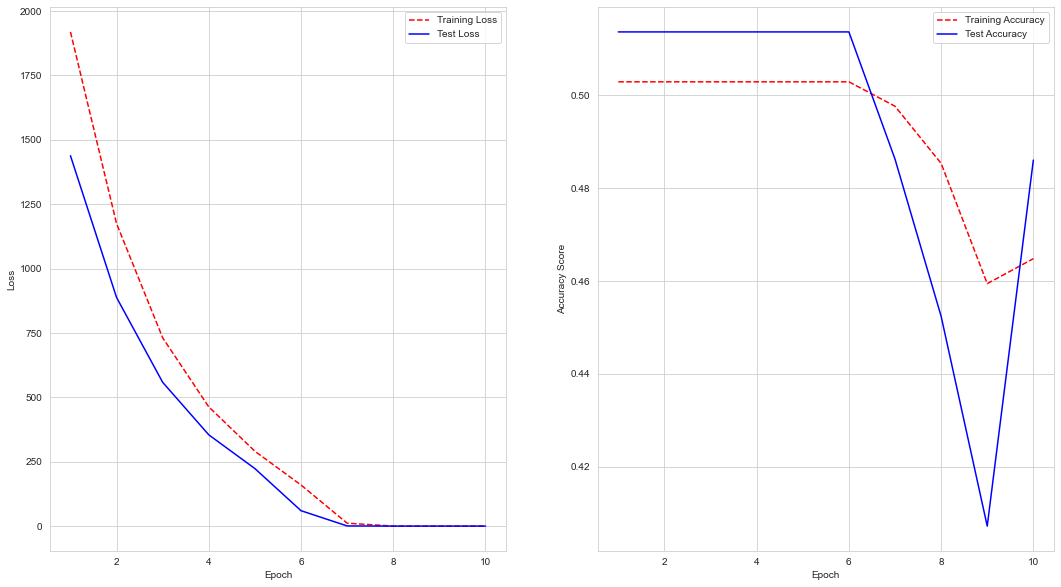

In [24]:
show_loss_acc(history_base_big)

### With Regularization

### L2

In [27]:
def network_regularization_l2():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", kernel_regularizer=regularizers.l2(0.01),
                             input_shape=(11,)))
    network.add(layers.Dense(units=6, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
        
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return network

network_l2 = network_regularization_l2()
history_l2 = network_l2.fit(x_train, y_train, epochs=10, verbose=1, batch_size=100,
                      validation_data=(x_test, y_test))

Epoch 1/10
551/551 [==============================] - 1s 1ms/step - loss: 14.9425 - accuracy: 0.5265 - val_loss: 6.4988 - val_accuracy: 0.5137
Epoch 2/10
551/551 [==============================] - 0s 904us/step - loss: 3.4279 - accuracy: 0.5298 - val_loss: 1.1063 - val_accuracy: 0.5781
Epoch 3/10
551/551 [==============================] - 0s 862us/step - loss: 2.0329 - accuracy: 0.5463 - val_loss: 0.7710 - val_accuracy: 0.6385
Epoch 4/10
551/551 [==============================] - 0s 871us/step - loss: 1.6437 - accuracy: 0.5549 - val_loss: 0.9975 - val_accuracy: 0.5811
Epoch 5/10
551/551 [==============================] - 0s 860us/step - loss: 1.5789 - accuracy: 0.5746 - val_loss: 0.8389 - val_accuracy: 0.6211
Epoch 6/10
551/551 [==============================] - 0s 873us/step - loss: 1.5251 - accuracy: 0.5771 - val_loss: 2.8482 - val_accuracy: 0.5152
Epoch 7/10
551/551 [==============================] - 0s 880us/step - loss: 1.6656 - accuracy: 0.5695 - val_loss: 0.7237 - val_accuracy: 

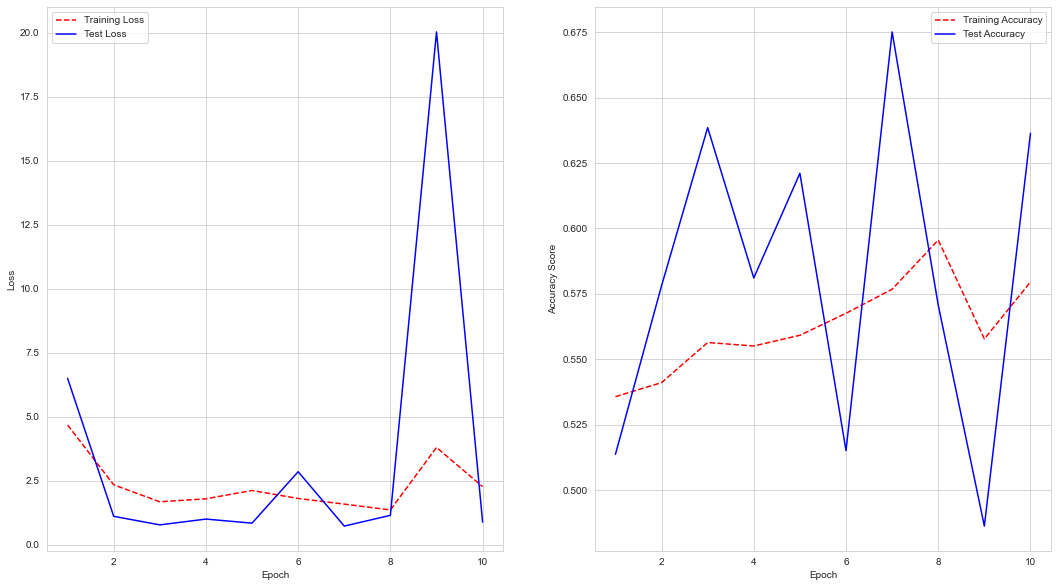

In [28]:
show_loss_acc(history_l2)

### L2 small

In [29]:
network_l2 = network_regularization_l2()
history_l2_small = network_l2.fit(x_train, y_train, epochs=10, verbose=1, batch_size=10,
                      validation_data=(x_test, y_test))

Epoch 1/10
5502/5502 [==============================] - 4s 747us/step - loss: 8.9255 - accuracy: 0.6104 - val_loss: 5.1177 - val_accuracy: 0.5101
Epoch 2/10
5502/5502 [==============================] - 4s 722us/step - loss: 2.6078 - accuracy: 0.6210 - val_loss: 1.5391 - val_accuracy: 0.6464
Epoch 3/10
5502/5502 [==============================] - 4s 746us/step - loss: 2.0633 - accuracy: 0.6165 - val_loss: 0.8742 - val_accuracy: 0.7018
Epoch 4/10
5502/5502 [==============================] - 4s 721us/step - loss: 1.8866 - accuracy: 0.6046 - val_loss: 0.8009 - val_accuracy: 0.7091
Epoch 5/10
5502/5502 [==============================] - 4s 720us/step - loss: 1.7004 - accuracy: 0.6120 - val_loss: 3.6387 - val_accuracy: 0.5178
Epoch 6/10
5502/5502 [==============================] - 4s 726us/step - loss: 1.5331 - accuracy: 0.6112 - val_loss: 2.1762 - val_accuracy: 0.5054
Epoch 7/10
5502/5502 [==============================] - 4s 721us/step - loss: 1.4771 - accuracy: 0.6056 - val_loss: 1.1866 -

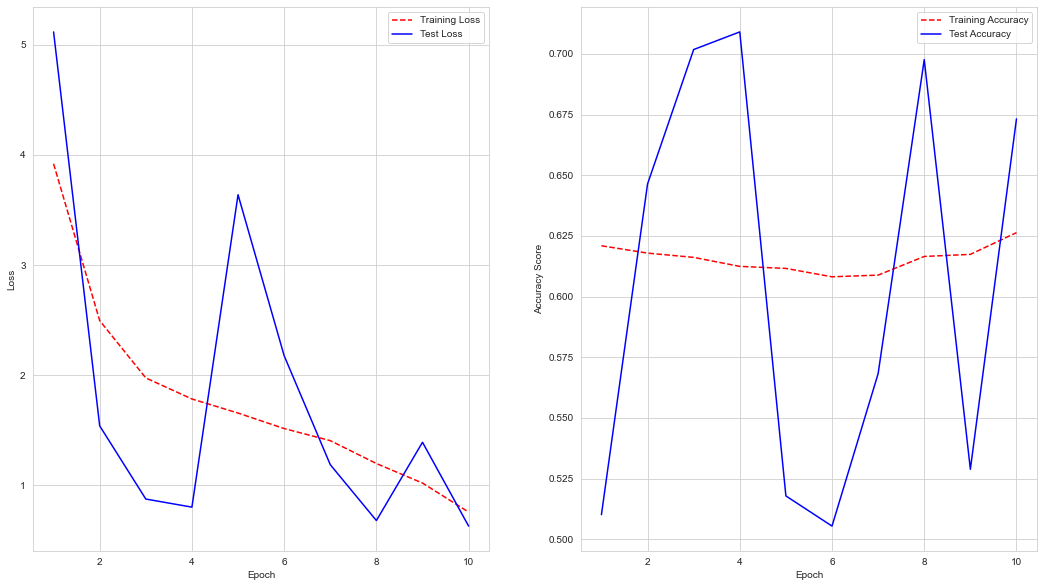

In [30]:
show_loss_acc(history_l2_small)

### L2 big

In [31]:
network_l2 = network_regularization_l2()
history_l2_big = network_l2.fit(x_train, y_train, epochs=10, verbose=1, batch_size=1000,
                      validation_data=(x_test, y_test))

Epoch 1/10
56/56 [==============================] - 1s 6ms/step - loss: 4453.7898 - accuracy: 0.5044 - val_loss: 2241.1008 - val_accuracy: 0.5137
Epoch 2/10
56/56 [==============================] - 0s 2ms/step - loss: 1473.4383 - accuracy: 0.5023 - val_loss: 81.6343 - val_accuracy: 0.5137
Epoch 3/10
56/56 [==============================] - 0s 2ms/step - loss: 30.9395 - accuracy: 0.4955 - val_loss: 5.9024 - val_accuracy: 0.4971
Epoch 4/10
56/56 [==============================] - 0s 2ms/step - loss: 5.0987 - accuracy: 0.4699 - val_loss: 4.7586 - val_accuracy: 0.4454
Epoch 5/10
56/56 [==============================] - 0s 2ms/step - loss: 4.4266 - accuracy: 0.4673 - val_loss: 5.2590 - val_accuracy: 0.4988
Epoch 6/10
56/56 [==============================] - 0s 2ms/step - loss: 4.4943 - accuracy: 0.4716 - val_loss: 4.0472 - val_accuracy: 0.4752
Epoch 7/10
56/56 [==============================] - 0s 2ms/step - loss: 4.1115 - accuracy: 0.4707 - val_loss: 7.2875 - val_accuracy: 0.4662
Epoch 8/1

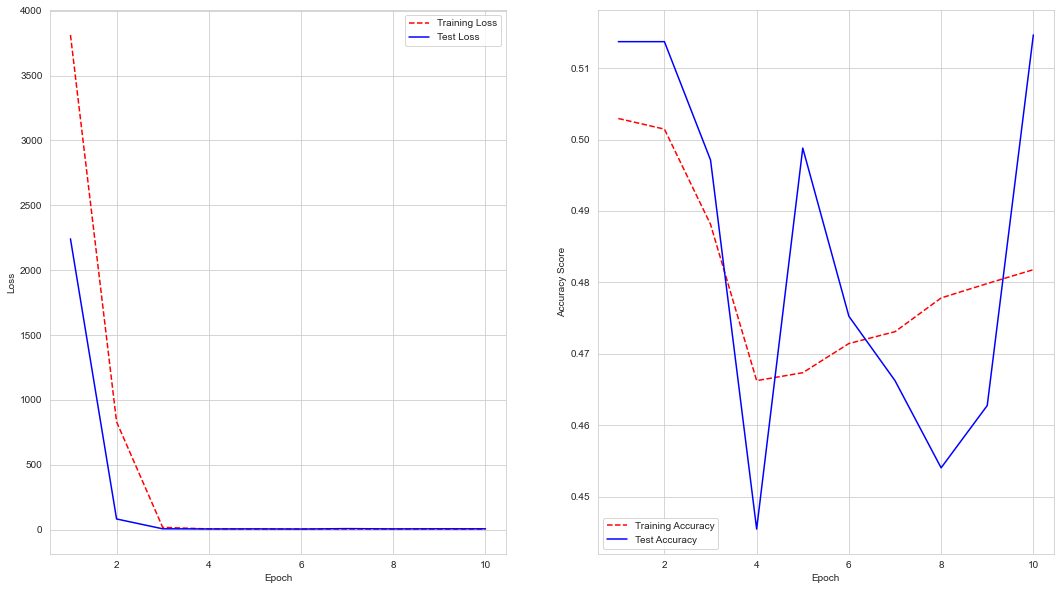

In [32]:
show_loss_acc(history_l2_big)

### L1

In [36]:
def network_regularization_l1():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", kernel_regularizer=regularizers.l1(0.01),
                             input_shape=(11,)))
    network.add(layers.Dense(units=6, kernel_regularizer=regularizers.l1(0.01), activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return network

network_l1 = network_regularization_l1()
history_l1 = network_l1.fit(x_train, y_train, epochs=10, verbose=1, batch_size=100,
                      validation_data=(x_test, y_test))

Epoch 1/10
551/551 [==============================] - 1s 1ms/step - loss: 87.4882 - accuracy: 0.5342 - val_loss: 0.9872 - val_accuracy: 0.5215
Epoch 2/10
551/551 [==============================] - 0s 860us/step - loss: 0.8798 - accuracy: 0.5955 - val_loss: 0.7801 - val_accuracy: 0.6501
Epoch 3/10
551/551 [==============================] - 0s 862us/step - loss: 0.8218 - accuracy: 0.6122 - val_loss: 0.8068 - val_accuracy: 0.6100
Epoch 4/10
551/551 [==============================] - 0s 875us/step - loss: 0.8041 - accuracy: 0.6166 - val_loss: 1.3422 - val_accuracy: 0.4946
Epoch 5/10
551/551 [==============================] - 0s 873us/step - loss: 0.8005 - accuracy: 0.6236 - val_loss: 0.8874 - val_accuracy: 0.5379
Epoch 6/10
551/551 [==============================] - 0s 880us/step - loss: 0.7663 - accuracy: 0.6308 - val_loss: 0.7106 - val_accuracy: 0.6610
Epoch 7/10
551/551 [==============================] - 0s 875us/step - loss: 0.7423 - accuracy: 0.6388 - val_loss: 1.2722 - val_accuracy: 

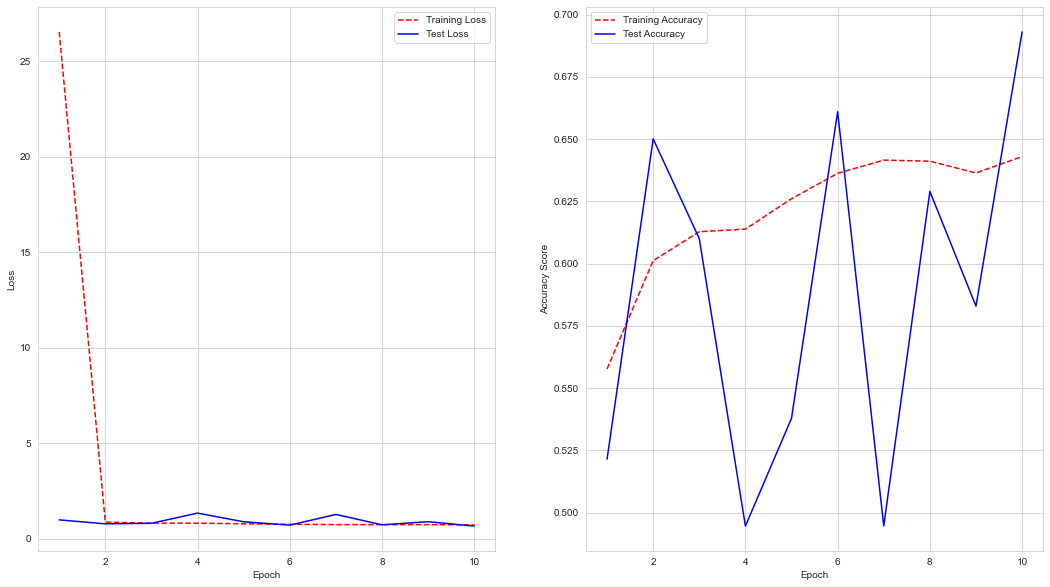

In [37]:
show_loss_acc(history_l1)

### L1 small

In [38]:
network_l1 = network_regularization_l1()
history_l1_small = network_l1.fit(x_train, y_train, epochs=10, verbose=1, batch_size=10,
                      validation_data=(x_test, y_test))

Epoch 1/10
5502/5502 [==============================] - 4s 758us/step - loss: 59.4882 - accuracy: 0.5568 - val_loss: 1.2004 - val_accuracy: 0.5370
Epoch 2/10
5502/5502 [==============================] - 4s 734us/step - loss: 1.0940 - accuracy: 0.5888 - val_loss: 1.1487 - val_accuracy: 0.5288
Epoch 3/10
5502/5502 [==============================] - 4s 734us/step - loss: 1.0231 - accuracy: 0.6007 - val_loss: 0.7022 - val_accuracy: 0.6700
Epoch 4/10
5502/5502 [==============================] - 4s 739us/step - loss: 0.9854 - accuracy: 0.6087 - val_loss: 0.8447 - val_accuracy: 0.6094
Epoch 5/10
5502/5502 [==============================] - 4s 734us/step - loss: 0.9390 - accuracy: 0.6119 - val_loss: 0.7109 - val_accuracy: 0.6694
Epoch 6/10
5502/5502 [==============================] - 4s 738us/step - loss: 0.8732 - accuracy: 0.6221 - val_loss: 1.3260 - val_accuracy: 0.5278
Epoch 7/10
5502/5502 [==============================] - 4s 752us/step - loss: 0.8400 - accuracy: 0.6225 - val_loss: 0.8090 

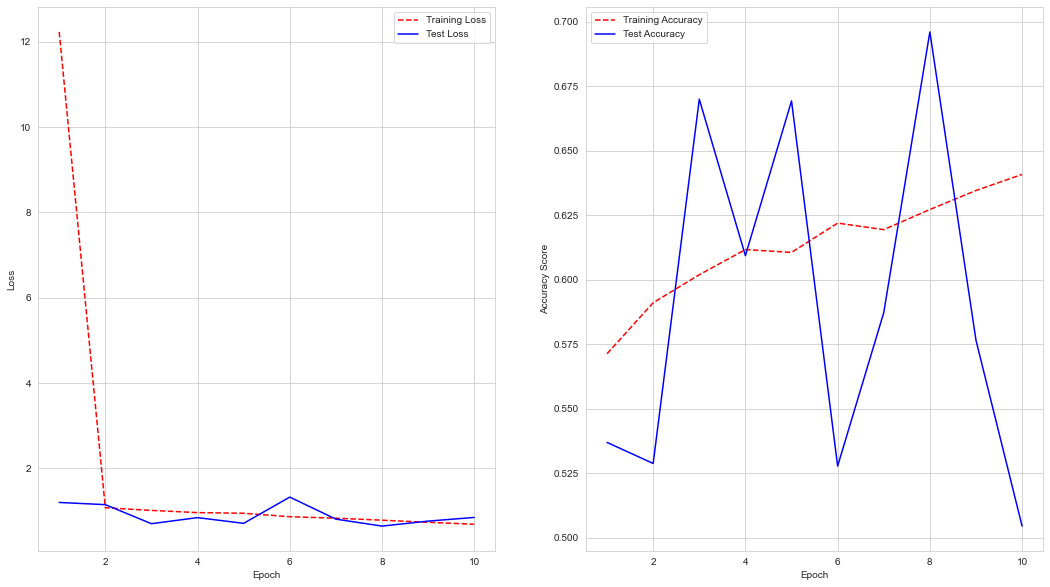

In [39]:
show_loss_acc(history_l1_small)

### L1 big

In [40]:
network_l1 = network_regularization_l1()
history_l1_big = network_l1.fit(x_train, y_train, epochs=10, verbose=1, batch_size=1000,
                      validation_data=(x_test, y_test))

Epoch 1/10
56/56 [==============================] - 1s 7ms/step - loss: 272.9202 - accuracy: 0.4952 - val_loss: 24.6619 - val_accuracy: 0.5137
Epoch 2/10
56/56 [==============================] - 0s 2ms/step - loss: 10.8380 - accuracy: 0.5209 - val_loss: 1.6137 - val_accuracy: 0.5927
Epoch 3/10
56/56 [==============================] - 0s 2ms/step - loss: 1.6191 - accuracy: 0.5862 - val_loss: 1.5451 - val_accuracy: 0.5937
Epoch 4/10
56/56 [==============================] - 0s 2ms/step - loss: 1.5244 - accuracy: 0.5884 - val_loss: 1.3048 - val_accuracy: 0.6129
Epoch 5/10
56/56 [==============================] - 0s 2ms/step - loss: 1.2474 - accuracy: 0.6142 - val_loss: 1.1767 - val_accuracy: 0.6201
Epoch 6/10
56/56 [==============================] - 0s 2ms/step - loss: 1.0560 - accuracy: 0.6445 - val_loss: 1.5232 - val_accuracy: 0.5828
Epoch 7/10
56/56 [==============================] - 0s 2ms/step - loss: 1.0941 - accuracy: 0.6344 - val_loss: 0.9738 - val_accuracy: 0.6497
Epoch 8/10
56/56

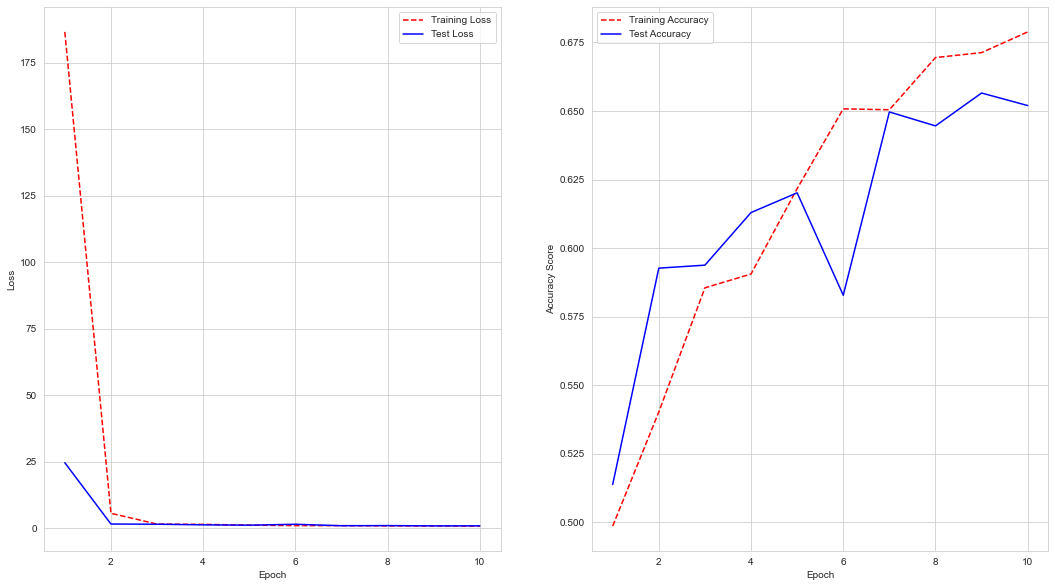

In [41]:
show_loss_acc(history_l1_big)

### Checkpoints and Early Stopping

### Base

In [42]:
def train_with_checkpoint(network, epochs=20, batch_size=100):
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    callbacks = [EarlyStopping(monitor="val_loss", patience=5),
                 ModelCheckpoint(filepath="best_model.h5", monitor="val_accuracy", save_best_only=True)]

    history = network.fit(x_train, y_train, epochs=epochs, callbacks=callbacks, verbose=1, batch_size=batch_size,
                          validation_data=(x_test, y_test))
    return history

network_base = create_network()
history_base_early = train_with_checkpoint(network_base)

Epoch 1/20
551/551 [==============================] - 1s 1ms/step - loss: 59.2544 - accuracy: 0.4945 - val_loss: 2.1175 - val_accuracy: 0.4862
Epoch 2/20
551/551 [==============================] - 0s 903us/step - loss: 1.5377 - accuracy: 0.5195 - val_loss: 0.7527 - val_accuracy: 0.5988
Epoch 3/20
551/551 [==============================] - 0s 880us/step - loss: 1.0284 - accuracy: 0.5556 - val_loss: 0.8527 - val_accuracy: 0.5923
Epoch 4/20
551/551 [==============================] - 0s 897us/step - loss: 1.1803 - accuracy: 0.5646 - val_loss: 1.9903 - val_accuracy: 0.5224
Epoch 5/20
551/551 [==============================] - 0s 880us/step - loss: 1.1203 - accuracy: 0.5763 - val_loss: 1.2944 - val_accuracy: 0.5467
Epoch 6/20
551/551 [==============================] - 0s 880us/step - loss: 1.0426 - accuracy: 0.5819 - val_loss: 0.7470 - val_accuracy: 0.6122
Epoch 7/20
551/551 [==============================] - 0s 873us/step - loss: 0.9064 - accuracy: 0.6174 - val_loss: 0.8793 - val_accuracy: 

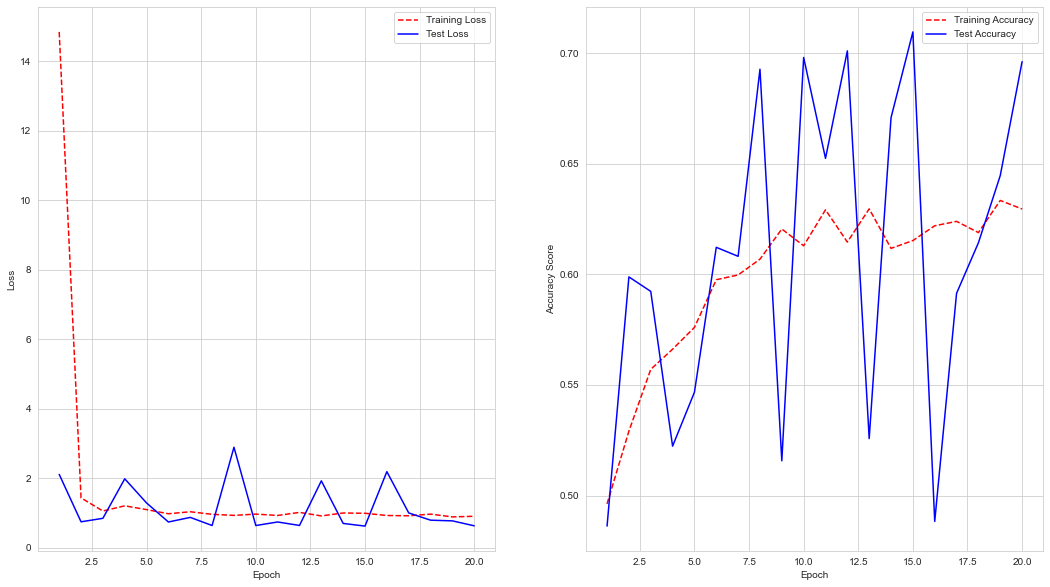

In [43]:
show_loss_acc(history_base_early)

### Base small

In [44]:
network_base = create_network()
history_base_small_early = train_with_checkpoint(network_base, batch_size=10)

Epoch 1/20
5502/5502 [==============================] - 4s 745us/step - loss: 14.7954 - accuracy: 0.4904 - val_loss: 1.9390 - val_accuracy: 0.4863
Epoch 2/20
5502/5502 [==============================] - 4s 724us/step - loss: 1.1452 - accuracy: 0.5170 - val_loss: 0.6802 - val_accuracy: 0.5283
Epoch 3/20
5502/5502 [==============================] - 4s 709us/step - loss: 1.0842 - accuracy: 0.5371 - val_loss: 2.5636 - val_accuracy: 0.4863
Epoch 4/20
5502/5502 [==============================] - 4s 711us/step - loss: 0.8883 - accuracy: 0.5696 - val_loss: 0.5884 - val_accuracy: 0.7083
Epoch 5/20
5502/5502 [==============================] - 4s 719us/step - loss: 0.7965 - accuracy: 0.6014 - val_loss: 0.6584 - val_accuracy: 0.6111
Epoch 6/20
5502/5502 [==============================] - 4s 715us/step - loss: 0.7231 - accuracy: 0.6158 - val_loss: 0.5934 - val_accuracy: 0.6981
Epoch 7/20
5502/5502 [==============================] - 4s 713us/step - loss: 0.6562 - accuracy: 0.6494 - val_loss: 0.6128 

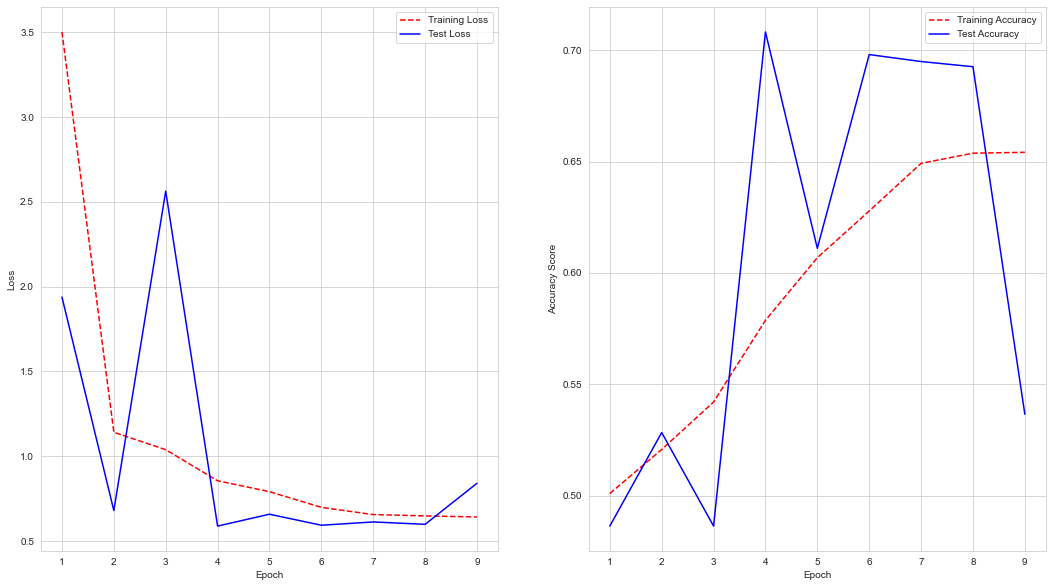

In [45]:
show_loss_acc(history_base_small_early)

### Base big

In [46]:
network_base = create_network()
history_base_big_early = train_with_checkpoint(network_base, batch_size=1000)

Epoch 1/20
56/56 [==============================] - 1s 7ms/step - loss: 1595.1820 - accuracy: 0.5001 - val_loss: 381.4261 - val_accuracy: 0.5137
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 183.7036 - accuracy: 0.5013 - val_loss: 10.2347 - val_accuracy: 0.4743
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 7.4345 - accuracy: 0.4596 - val_loss: 6.2562 - val_accuracy: 0.4467
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 6.0864 - accuracy: 0.4548 - val_loss: 6.1583 - val_accuracy: 0.4475
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 5.9438 - accuracy: 0.4547 - val_loss: 6.0515 - val_accuracy: 0.4469
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 5.6263 - accuracy: 0.4559 - val_loss: 5.5937 - val_accuracy: 0.4445
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 5.4809 - accuracy: 0.4520 - val_loss: 5.3493 - val_accuracy: 0.4431
Epoch 8/20
5

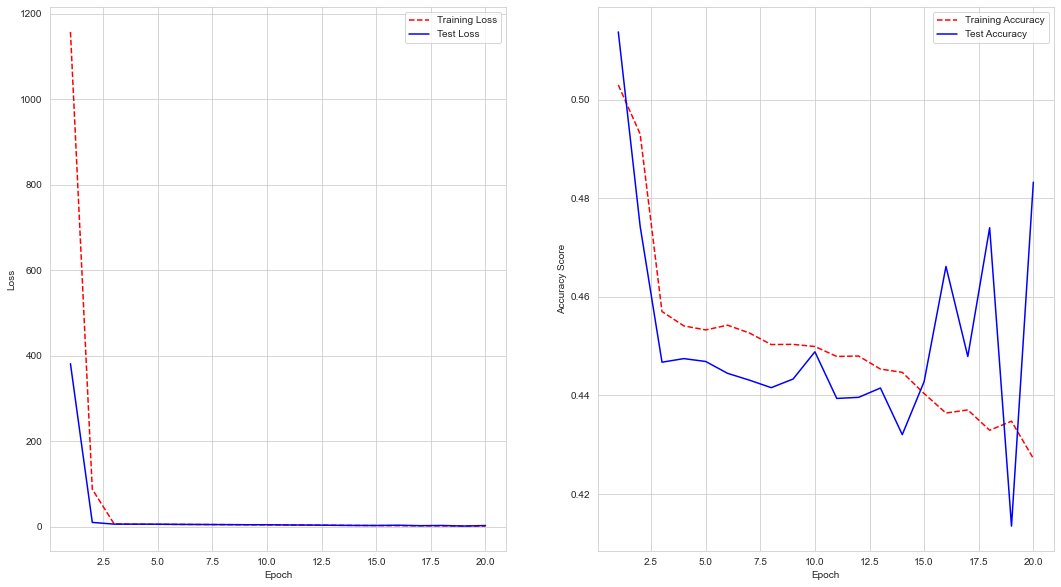

In [47]:
show_loss_acc(history_base_big_early)

### L2

In [48]:
network_l2 = network_regularization_l2()
history_l2_early = train_with_checkpoint(network_l2)

Epoch 1/20
551/551 [==============================] - 1s 1ms/step - loss: 1207.7824 - accuracy: 0.4765 - val_loss: 1.2155 - val_accuracy: 0.3741
Epoch 2/20
551/551 [==============================] - 1s 1ms/step - loss: 1.7539 - accuracy: 0.4604 - val_loss: 2.4339 - val_accuracy: 0.5136
Epoch 3/20
551/551 [==============================] - 0s 875us/step - loss: 2.9047 - accuracy: 0.4895 - val_loss: 0.8835 - val_accuracy: 0.4846
Epoch 4/20
551/551 [==============================] - 0s 867us/step - loss: 1.8627 - accuracy: 0.5048 - val_loss: 3.9088 - val_accuracy: 0.5137
Epoch 5/20
551/551 [==============================] - 0s 862us/step - loss: 2.9276 - accuracy: 0.5095 - val_loss: 0.6955 - val_accuracy: 0.6135
Epoch 6/20
551/551 [==============================] - 0s 864us/step - loss: 1.2479 - accuracy: 0.5536 - val_loss: 0.6626 - val_accuracy: 0.6673
Epoch 7/20
551/551 [==============================] - 0s 866us/step - loss: 1.3196 - accuracy: 0.5587 - val_loss: 0.6390 - val_accuracy: 

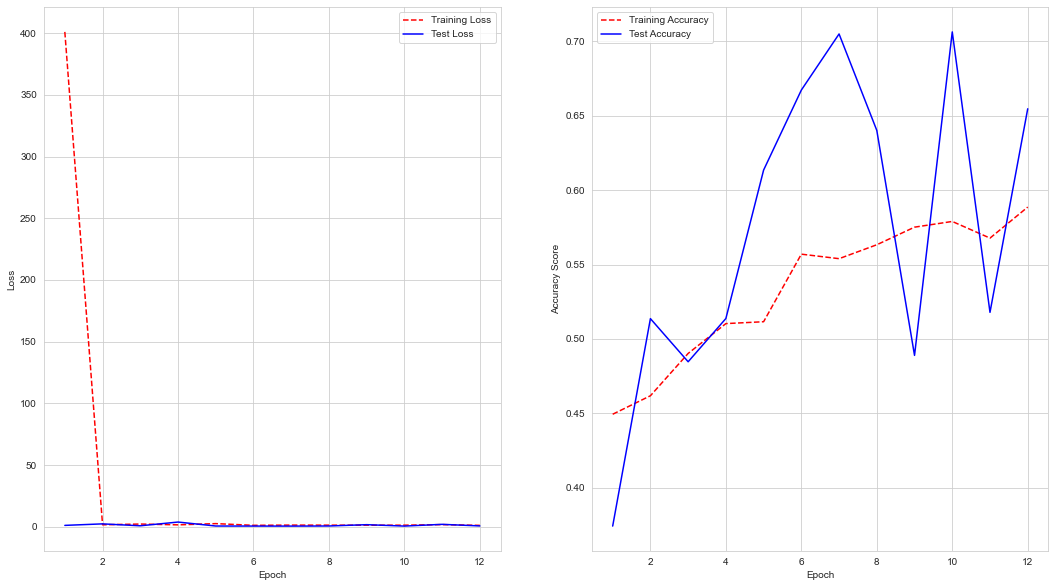

In [49]:
show_loss_acc(history_l2_early)

### L2 small

In [50]:
network_l2 = network_regularization_l2()
history_l2_small_early = train_with_checkpoint(network_l2, batch_size=10)

Epoch 1/20
5502/5502 [==============================] - 4s 742us/step - loss: 43.3665 - accuracy: 0.5726 - val_loss: 0.8811 - val_accuracy: 0.6928
Epoch 2/20
5502/5502 [==============================] - 4s 714us/step - loss: 2.0916 - accuracy: 0.5968 - val_loss: 1.5927 - val_accuracy: 0.5664
Epoch 3/20
5502/5502 [==============================] - 4s 711us/step - loss: 2.3226 - accuracy: 0.5906 - val_loss: 0.8598 - val_accuracy: 0.6914
Epoch 4/20
5502/5502 [==============================] - 4s 713us/step - loss: 2.1214 - accuracy: 0.6011 - val_loss: 1.4194 - val_accuracy: 0.6179
Epoch 5/20
5502/5502 [==============================] - 4s 705us/step - loss: 1.9548 - accuracy: 0.6041 - val_loss: 4.4148 - val_accuracy: 0.4889
Epoch 6/20
5502/5502 [==============================] - 4s 705us/step - loss: 1.8142 - accuracy: 0.6079 - val_loss: 0.8139 - val_accuracy: 0.7029
Epoch 7/20
5502/5502 [==============================] - 4s 711us/step - loss: 1.9131 - accuracy: 0.6005 - val_loss: 1.9069 

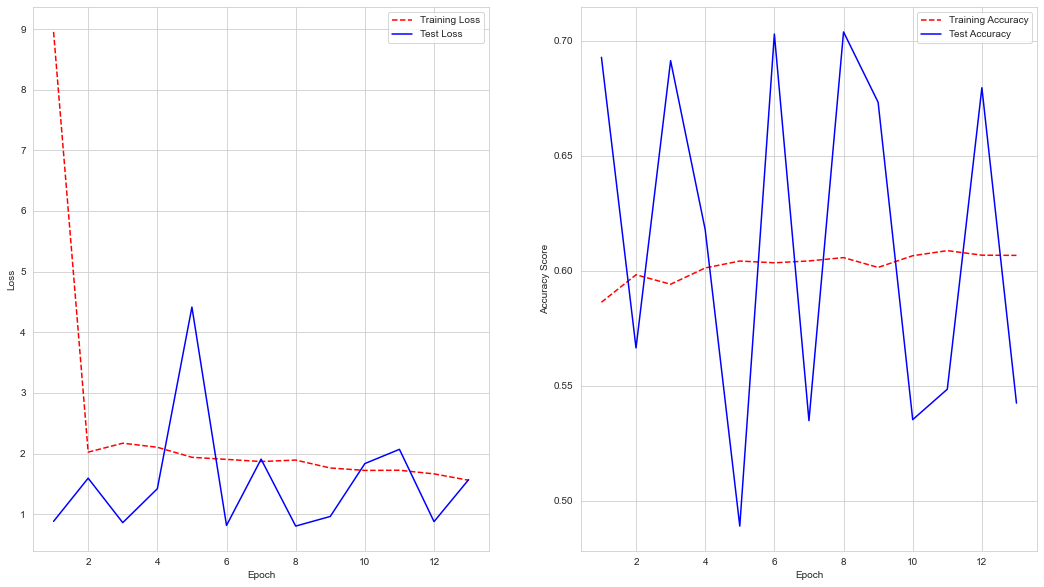

In [51]:
show_loss_acc(history_l2_small_early)

### L2 big

In [52]:
network_l2 = network_regularization_l2()
history_l2_big_early = train_with_checkpoint(network_l2, batch_size=1000)

Epoch 1/20
56/56 [==============================] - 1s 5ms/step - loss: 3947.5479 - accuracy: 0.5023 - val_loss: 1996.4254 - val_accuracy: 0.5137
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 1463.1948 - accuracy: 0.5013 - val_loss: 128.4984 - val_accuracy: 0.4863
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 55.2787 - accuracy: 0.5093 - val_loss: 4.6870 - val_accuracy: 0.5681
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 3.3425 - accuracy: 0.5871 - val_loss: 2.5972 - val_accuracy: 0.6096
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 2.5034 - accuracy: 0.6089 - val_loss: 2.9521 - val_accuracy: 0.6015
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 2.5464 - accuracy: 0.6127 - val_loss: 2.5411 - val_accuracy: 0.5949
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 2.3619 - accuracy: 0.6183 - val_loss: 2.2196 - val_accuracy: 0.6278
Epoch 8/

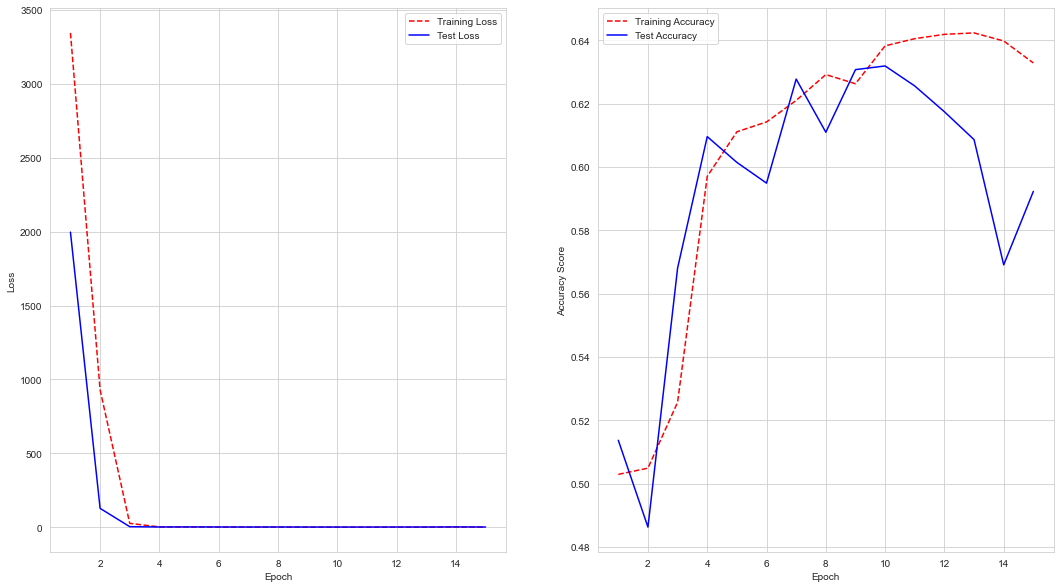

In [53]:
show_loss_acc(history_l2_big_early)

### L1 

In [56]:
network_l1 = network_regularization_l1()
history_l1_early = train_with_checkpoint(network_l1)

Epoch 1/20
551/551 [==============================] - 1s 1ms/step - loss: 227.2040 - accuracy: 0.4838 - val_loss: 2.5136 - val_accuracy: 0.4746
Epoch 2/20
551/551 [==============================] - 0s 876us/step - loss: 1.6895 - accuracy: 0.4978 - val_loss: 0.8411 - val_accuracy: 0.5748
Epoch 3/20
551/551 [==============================] - 0s 860us/step - loss: 1.8862 - accuracy: 0.5326 - val_loss: 1.0698 - val_accuracy: 0.5352
Epoch 4/20
551/551 [==============================] - 0s 871us/step - loss: 1.2890 - accuracy: 0.5609 - val_loss: 0.9302 - val_accuracy: 0.5852
Epoch 5/20
551/551 [==============================] - 0s 866us/step - loss: 1.6227 - accuracy: 0.5575 - val_loss: 0.7240 - val_accuracy: 0.6979
Epoch 6/20
551/551 [==============================] - 0s 869us/step - loss: 1.1020 - accuracy: 0.6065 - val_loss: 0.9647 - val_accuracy: 0.6029
Epoch 7/20
551/551 [==============================] - 0s 866us/step - loss: 1.0364 - accuracy: 0.6187 - val_loss: 1.1934 - val_accuracy:

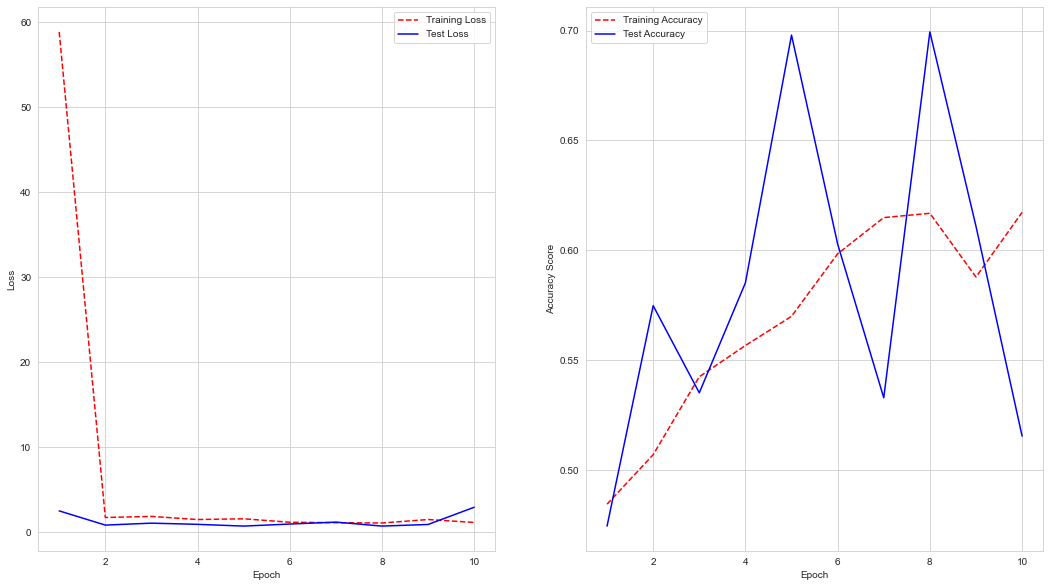

In [57]:
show_loss_acc(history_l1_early)

### L1 small

In [58]:
network_l1 = network_regularization_l1()
history_l1_small_early = train_with_checkpoint(network_l1, batch_size=10)

Epoch 1/20
5502/5502 [==============================] - 4s 745us/step - loss: 109.8836 - accuracy: 0.5370 - val_loss: 4.4264 - val_accuracy: 0.5138
Epoch 2/20
5502/5502 [==============================] - 4s 712us/step - loss: 1.4444 - accuracy: 0.5759 - val_loss: 1.9133 - val_accuracy: 0.5215
Epoch 3/20
5502/5502 [==============================] - 4s 735us/step - loss: 1.4640 - accuracy: 0.5829 - val_loss: 1.3089 - val_accuracy: 0.5525
Epoch 4/20
5502/5502 [==============================] - 4s 725us/step - loss: 1.3679 - accuracy: 0.5941 - val_loss: 1.3211 - val_accuracy: 0.5274
Epoch 5/20
5502/5502 [==============================] - 4s 717us/step - loss: 1.3386 - accuracy: 0.5973 - val_loss: 2.7323 - val_accuracy: 0.4877
Epoch 6/20
5502/5502 [==============================] - 4s 754us/step - loss: 1.2761 - accuracy: 0.6012 - val_loss: 0.7199 - val_accuracy: 0.6995
Epoch 7/20
5502/5502 [==============================] - 4s 731us/step - loss: 1.2687 - accuracy: 0.5978 - val_loss: 0.7522

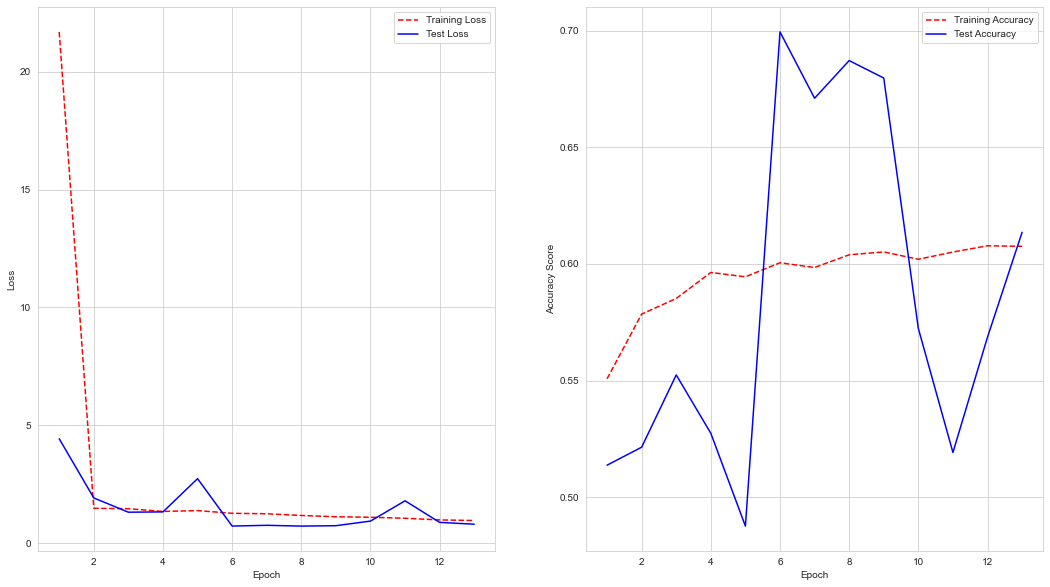

In [59]:
show_loss_acc(history_l1_small_early)

### L1 big

In [60]:
network_l1 = network_regularization_l1()
history_l1_big_early = train_with_checkpoint(network_l1, batch_size=1000)

Epoch 1/20
56/56 [==============================] - 1s 5ms/step - loss: 590.7249 - accuracy: 0.5035 - val_loss: 30.1394 - val_accuracy: 0.5137
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 16.0026 - accuracy: 0.5030 - val_loss: 0.9583 - val_accuracy: 0.4095
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 1.1701 - accuracy: 0.4860 - val_loss: 0.9196 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.9119 - accuracy: 0.4903 - val_loss: 1.0044 - val_accuracy: 0.5137
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 0.9094 - accuracy: 0.4969 - val_loss: 0.8854 - val_accuracy: 0.5137
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.8645 - accuracy: 0.4956 - val_loss: 1.2446 - val_accuracy: 0.5137
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.9699 - accuracy: 0.4955 - val_loss: 0.8060 - val_accuracy: 0.4863
Epoch 8/20
56/56

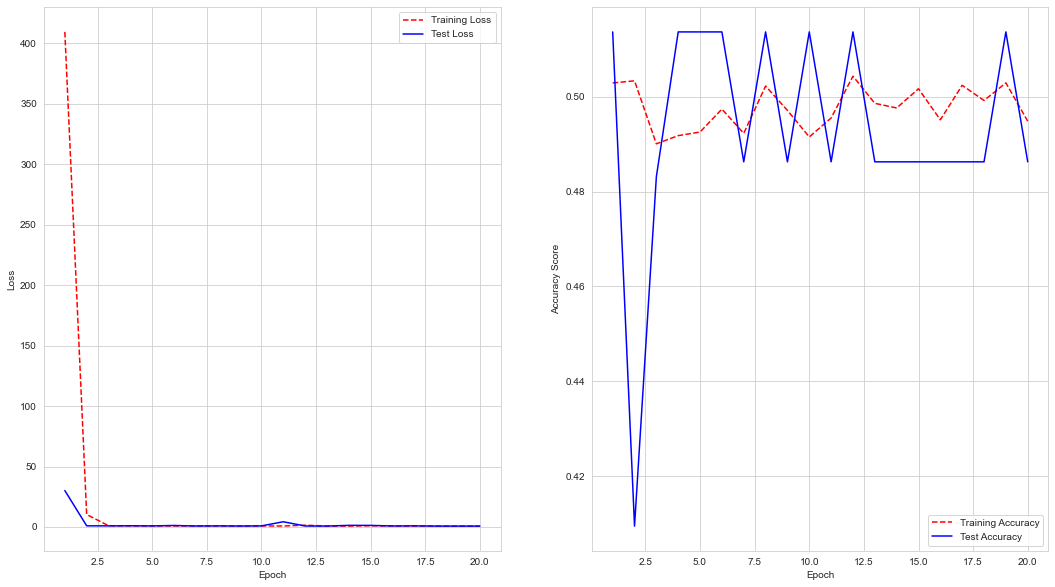

In [61]:
show_loss_acc(history_l1_big_early)

### Dropout

### Base

In [103]:
def create_network_dropout_base():
    network = models.Sequential()

    network.add(layers.Dropout(0.2, input_shape=(11,)))
    network.add(layers.Dense(units=6, activation="relu"))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(units=6, activation="relu"))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(units=1, activation="sigmoid"))

    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return network

network_dropout_base = create_network_dropout_base()
history_dropout_base = train_with_checkpoint(network_dropout_base, batch_size=100)

Epoch 1/20
551/551 [==============================] - 1s 1ms/step - loss: 900.3759 - accuracy: 0.4934 - val_loss: 0.6959 - val_accuracy: 0.4863
Epoch 2/20
551/551 [==============================] - 1s 971us/step - loss: 0.7224 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4863
Epoch 3/20
551/551 [==============================] - 1s 987us/step - loss: 0.7060 - accuracy: 0.5047 - val_loss: 0.6930 - val_accuracy: 0.5137
Epoch 4/20
551/551 [==============================] - 1s 969us/step - loss: 0.6989 - accuracy: 0.4962 - val_loss: 0.6930 - val_accuracy: 0.5137
Epoch 5/20
551/551 [==============================] - 1s 1ms/step - loss: 0.6958 - accuracy: 0.5064 - val_loss: 0.6931 - val_accuracy: 0.5137
Epoch 6/20
551/551 [==============================] - 1s 969us/step - loss: 0.6949 - accuracy: 0.5012 - val_loss: 0.6929 - val_accuracy: 0.5137
Epoch 7/20
551/551 [==============================] - 1s 969us/step - loss: 0.6936 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0

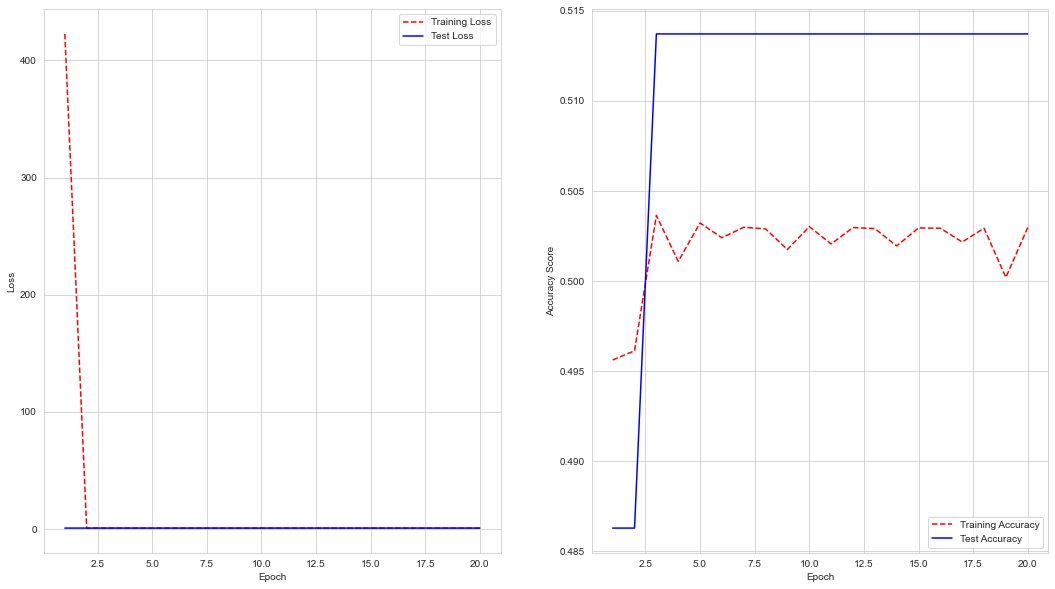

In [104]:
show_loss_acc(history_dropout_base)

### Base small

In [78]:
network_dropout_base = create_network_dropout_base()
history_dropout_base_small = train_with_checkpoint(network_dropout_base, batch_size=10)

Epoch 1/20
5502/5502 [==============================] - 4s 755us/step - loss: 20.1977 - accuracy: 0.4990 - val_loss: 0.6936 - val_accuracy: 0.5137
Epoch 2/20
5502/5502 [==============================] - 4s 721us/step - loss: 0.6994 - accuracy: 0.5033 - val_loss: 0.6929 - val_accuracy: 0.5137
Epoch 3/20
5502/5502 [==============================] - 4s 730us/step - loss: 0.6935 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4863
Epoch 4/20
5502/5502 [==============================] - 4s 723us/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5137
Epoch 5/20
5502/5502 [==============================] - 4s 729us/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6928 - val_accuracy: 0.5137
Epoch 6/20
5502/5502 [==============================] - 4s 723us/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6930 - val_accuracy: 0.5137
Epoch 7/20
5502/5502 [==============================] - 4s 727us/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6932 

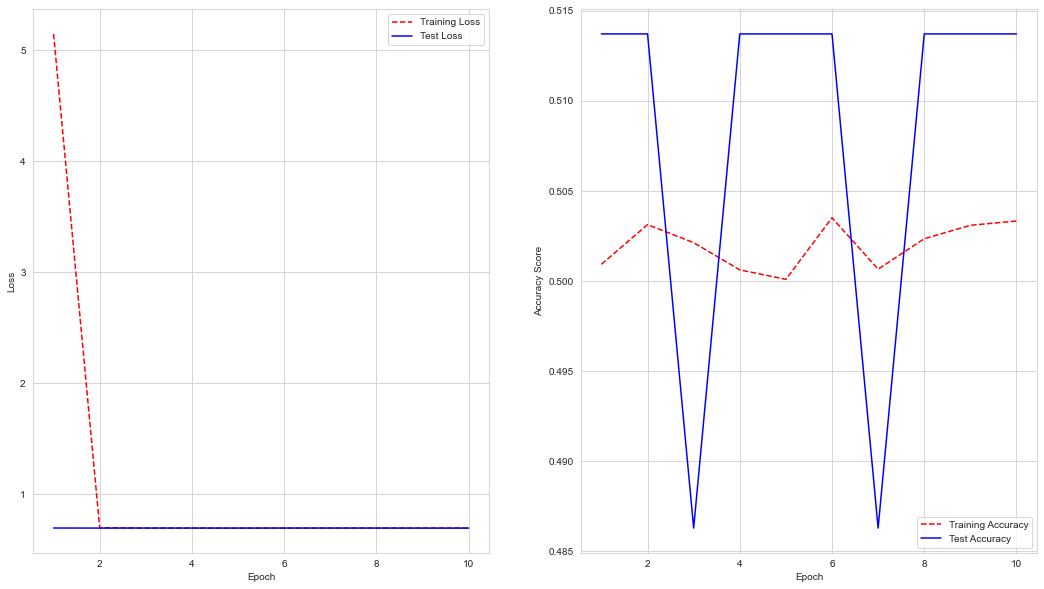

In [79]:
show_loss_acc(history_dropout_base_small)

### Base big

In [85]:
network_dropout_base = create_network_dropout_base()
history_dropout_base_big = train_with_checkpoint(network_dropout_base, batch_size=1000)

Epoch 1/20
56/56 [==============================] - 1s 5ms/step - loss: 1313.9705 - accuracy: 0.5009 - val_loss: 498.4942 - val_accuracy: 0.5137
Epoch 2/20
56/56 [==============================] - 0s 3ms/step - loss: 588.5375 - accuracy: 0.4993 - val_loss: 174.2754 - val_accuracy: 0.5137
Epoch 3/20
56/56 [==============================] - 0s 6ms/step - loss: 292.6154 - accuracy: 0.4995 - val_loss: 85.5126 - val_accuracy: 0.5137
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 167.4548 - accuracy: 0.5028 - val_loss: 57.1117 - val_accuracy: 0.5137
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 99.9411 - accuracy: 0.5032 - val_loss: 29.3416 - val_accuracy: 0.5137
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 56.2598 - accuracy: 0.4982 - val_loss: 9.0469 - val_accuracy: 0.5137
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 25.4688 - accuracy: 0.4981 - val_loss: 0.7327 - val_accuracy: 0.4863
E

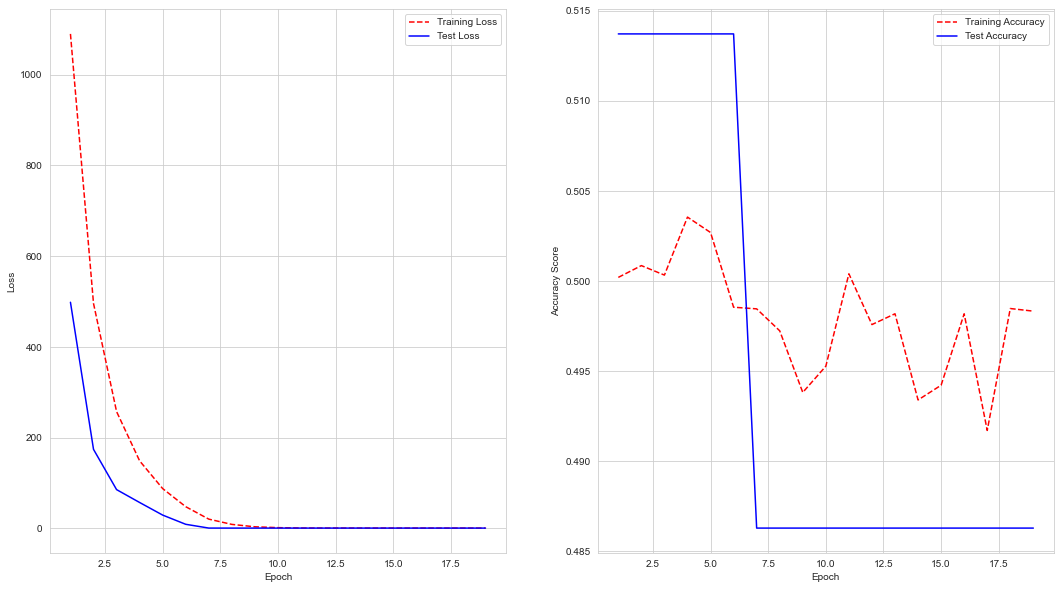

In [86]:
show_loss_acc(history_dropout_base_big)

### L2

In [87]:
def network_dropout_regularization_l2():
    network = models.Sequential()
    network.add(layers.Dropout(0.2, input_shape=(11,)))
    network.add(layers.Dense(units=6, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(units=6, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(units=1, activation="sigmoid"))
        
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return network
                
network_dropout_l2 = network_dropout_regularization_l2()
history_dropout_l2 = train_with_checkpoint(network_dropout_l2, batch_size=100)

Epoch 1/20
551/551 [==============================] - 1s 1ms/step - loss: 35.0512 - accuracy: 0.5000 - val_loss: 0.7360 - val_accuracy: 0.4863
Epoch 2/20
551/551 [==============================] - 1s 980us/step - loss: 0.8489 - accuracy: 0.4919 - val_loss: 0.7254 - val_accuracy: 0.4863
Epoch 3/20
551/551 [==============================] - 1s 1ms/step - loss: 0.7443 - accuracy: 0.4950 - val_loss: 0.7195 - val_accuracy: 0.5137
Epoch 4/20
551/551 [==============================] - 1s 998us/step - loss: 0.7228 - accuracy: 0.4977 - val_loss: 0.7147 - val_accuracy: 0.5137
Epoch 5/20
551/551 [==============================] - 1s 987us/step - loss: 0.7206 - accuracy: 0.5024 - val_loss: 0.7113 - val_accuracy: 0.5137
Epoch 6/20
551/551 [==============================] - 1s 978us/step - loss: 0.7125 - accuracy: 0.5029 - val_loss: 0.7082 - val_accuracy: 0.5137
Epoch 7/20
551/551 [==============================] - 1s 992us/step - loss: 0.7080 - accuracy: 0.5017 - val_loss: 0.7056 - val_accuracy: 0.

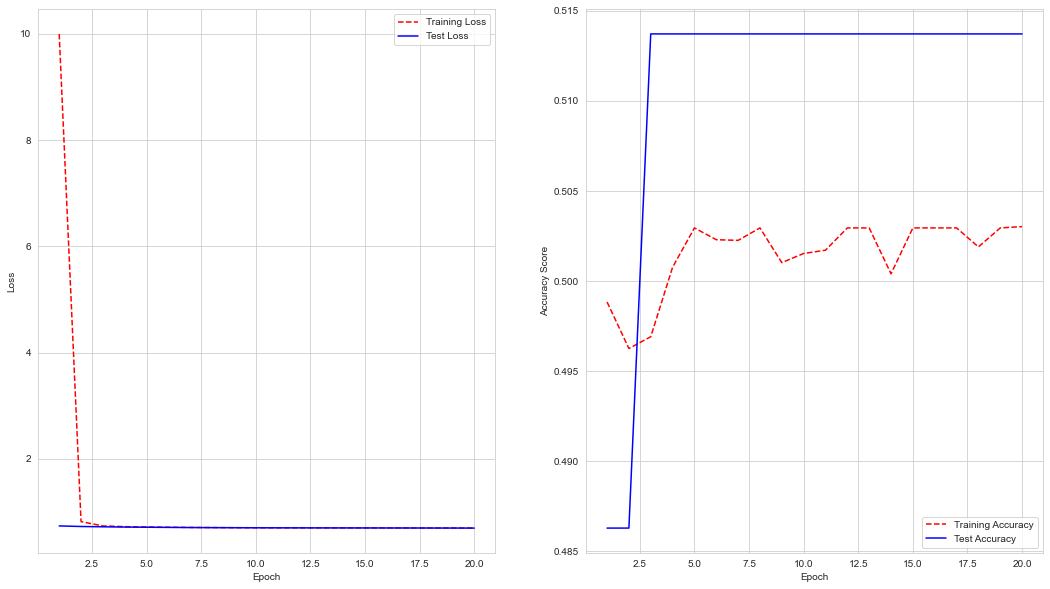

In [88]:
show_loss_acc(history_dropout_l2)

### L2 small

In [89]:
network_dropout_l2 = network_dropout_regularization_l2()
history_dropout_l2_small = train_with_checkpoint(network_dropout_l2, batch_size=10)

Epoch 1/20
5502/5502 [==============================] - 5s 764us/step - loss: 398.4471 - accuracy: 0.5020 - val_loss: 0.7226 - val_accuracy: 0.5137
Epoch 2/20
5502/5502 [==============================] - 4s 730us/step - loss: 0.7192 - accuracy: 0.5015 - val_loss: 0.7039 - val_accuracy: 0.5137
Epoch 3/20
5502/5502 [==============================] - 4s 733us/step - loss: 0.7000 - accuracy: 0.5026 - val_loss: 0.6940 - val_accuracy: 0.5137
Epoch 4/20
5502/5502 [==============================] - 4s 731us/step - loss: 0.6940 - accuracy: 0.5026 - val_loss: 0.6930 - val_accuracy: 0.5137
Epoch 5/20
5502/5502 [==============================] - 4s 730us/step - loss: 0.6933 - accuracy: 0.4984 - val_loss: 0.6929 - val_accuracy: 0.5137
Epoch 6/20
5502/5502 [==============================] - 4s 752us/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5137
Epoch 7/20
5502/5502 [==============================] - 4s 749us/step - loss: 0.6932 - accuracy: 0.5024 - val_loss: 0.6931

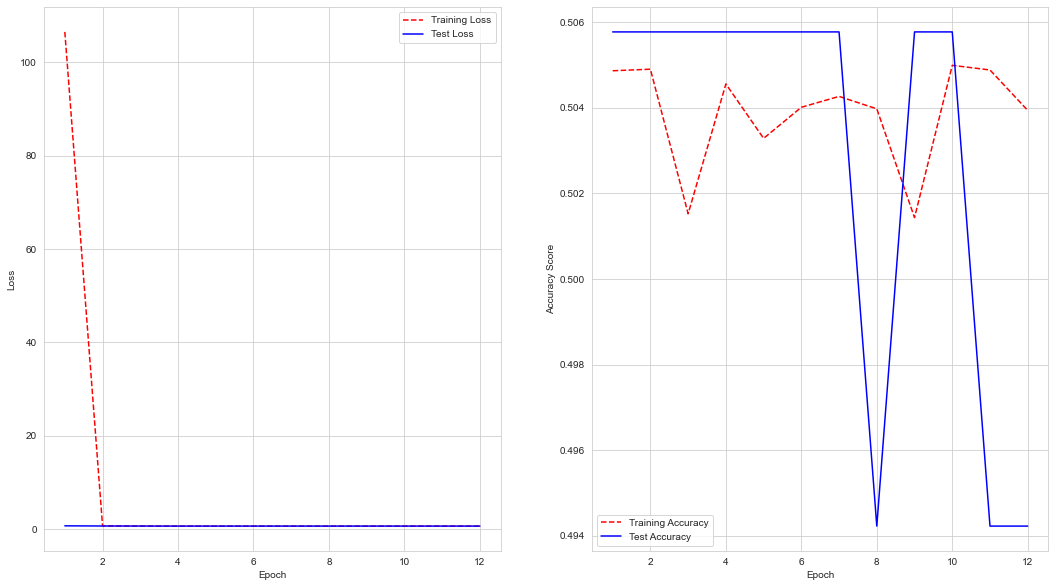

In [50]:
show_loss_acc(history_dropout_l2_small)

### L2 big

In [94]:
network_dropout_l2 = network_dropout_regularization_l2()
history_dropout_l2_big = train_with_checkpoint(network_dropout_l2, batch_size=1000)

Epoch 1/20
56/56 [==============================] - 1s 6ms/step - loss: 2291.7351 - accuracy: 0.5014 - val_loss: 879.2845 - val_accuracy: 0.4863
Epoch 2/20
56/56 [==============================] - 0s 3ms/step - loss: 1459.4203 - accuracy: 0.4977 - val_loss: 538.6314 - val_accuracy: 0.4863
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 961.2756 - accuracy: 0.4956 - val_loss: 251.7694 - val_accuracy: 0.4863
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 622.8190 - accuracy: 0.4996 - val_loss: 96.7399 - val_accuracy: 0.4863
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 402.8745 - accuracy: 0.4974 - val_loss: 8.7256 - val_accuracy: 0.5138
Epoch 6/20
56/56 [==============================] - 0s 4ms/step - loss: 252.4258 - accuracy: 0.5015 - val_loss: 14.3447 - val_accuracy: 0.5137
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 169.3547 - accuracy: 0.4986 - val_loss: 11.7264 - val_accuracy: 0.

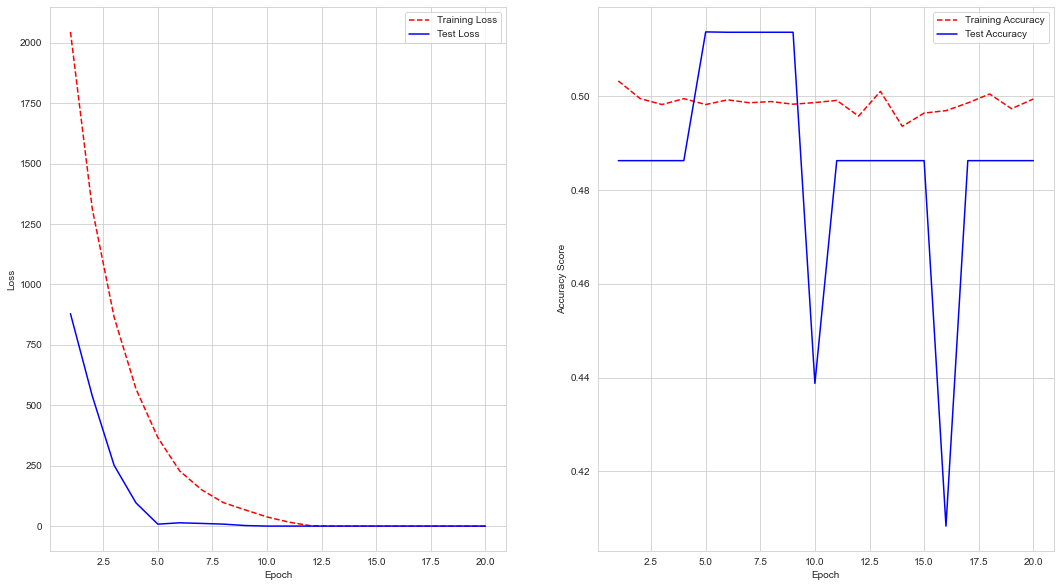

In [95]:
show_loss_acc(history_dropout_l2_big)

### L1

In [96]:
def network_dropout_regularization_l1():
    network = models.Sequential()
    network.add(layers.Dropout(0.2, input_shape=(11,)))
    network.add(layers.Dense(units=6, activation="relu", kernel_regularizer=regularizers.l1(0.01)))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(units=6, kernel_regularizer=regularizers.l1(0.01), activation="relu"))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(units=1, activation="sigmoid"))
        
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return network

network_dropout_l1 = network_dropout_regularization_l1()
history_dropout_l1 = train_with_checkpoint(network_dropout_l1, batch_size=100)

Epoch 1/20
551/551 [==============================] - 1s 1ms/step - loss: 406.0464 - accuracy: 0.5013 - val_loss: 0.8524 - val_accuracy: 0.5137
Epoch 2/20
551/551 [==============================] - 1s 1ms/step - loss: 1.0894 - accuracy: 0.5030 - val_loss: 0.8117 - val_accuracy: 0.5137
Epoch 3/20
551/551 [==============================] - 1s 1ms/step - loss: 0.8400 - accuracy: 0.5034 - val_loss: 0.7931 - val_accuracy: 0.5137
Epoch 4/20
551/551 [==============================] - 1s 1ms/step - loss: 0.8037 - accuracy: 0.5027 - val_loss: 0.7786 - val_accuracy: 0.5137
Epoch 5/20
551/551 [==============================] - 1s 1ms/step - loss: 0.7801 - accuracy: 0.5006 - val_loss: 0.7645 - val_accuracy: 0.5137
Epoch 6/20
551/551 [==============================] - 1s 1ms/step - loss: 0.7671 - accuracy: 0.5076 - val_loss: 0.7543 - val_accuracy: 0.5137
Epoch 7/20
551/551 [==============================] - 1s 1ms/step - loss: 0.7544 - accuracy: 0.5051 - val_loss: 0.7447 - val_accuracy: 0.5137
Epoc

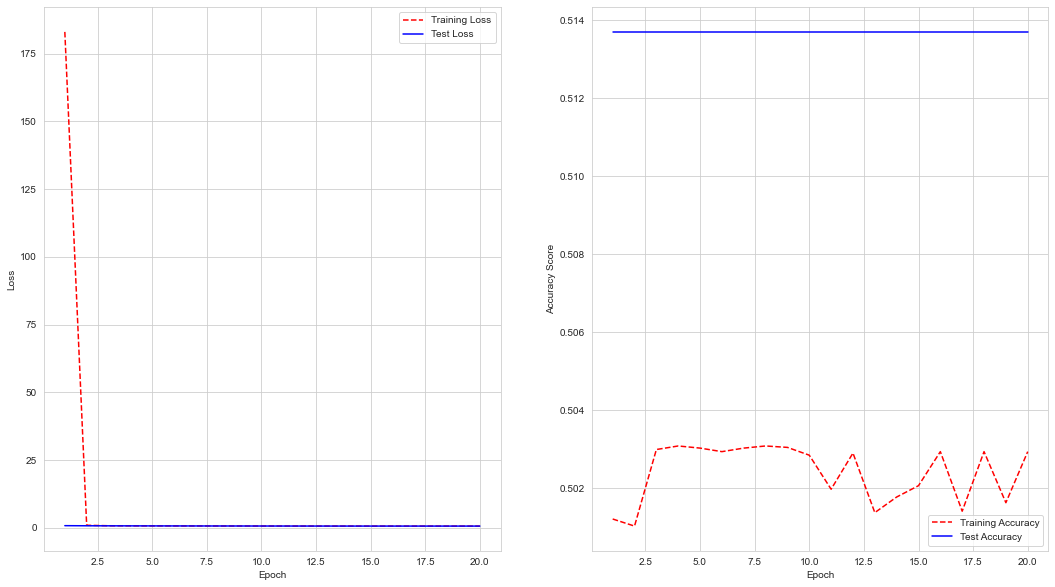

In [97]:
show_loss_acc(history_dropout_l1)

### L1 small

In [98]:
network_dropout_l1 = network_dropout_regularization_l1()
history_dropout_l1_small = train_with_checkpoint(network_dropout_l1, batch_size=10)

Epoch 1/20
5502/5502 [==============================] - 5s 921us/step - loss: 532.9259 - accuracy: 0.4995 - val_loss: 0.8350 - val_accuracy: 0.5137
Epoch 2/20
5502/5502 [==============================] - 4s 773us/step - loss: 0.8286 - accuracy: 0.5015 - val_loss: 0.7704 - val_accuracy: 0.5137
Epoch 3/20
5502/5502 [==============================] - 4s 765us/step - loss: 0.7543 - accuracy: 0.5059 - val_loss: 0.7087 - val_accuracy: 0.4863
Epoch 4/20
5502/5502 [==============================] - 4s 762us/step - loss: 0.7018 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.5137
Epoch 5/20
5502/5502 [==============================] - 4s 803us/step - loss: 0.6933 - accuracy: 0.5024 - val_loss: 0.6931 - val_accuracy: 0.5137
Epoch 6/20
5502/5502 [==============================] - 4s 733us/step - loss: 0.6933 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.5137
Epoch 7/20
5502/5502 [==============================] - 4s 737us/step - loss: 0.6933 - accuracy: 0.4962 - val_loss: 0.6931

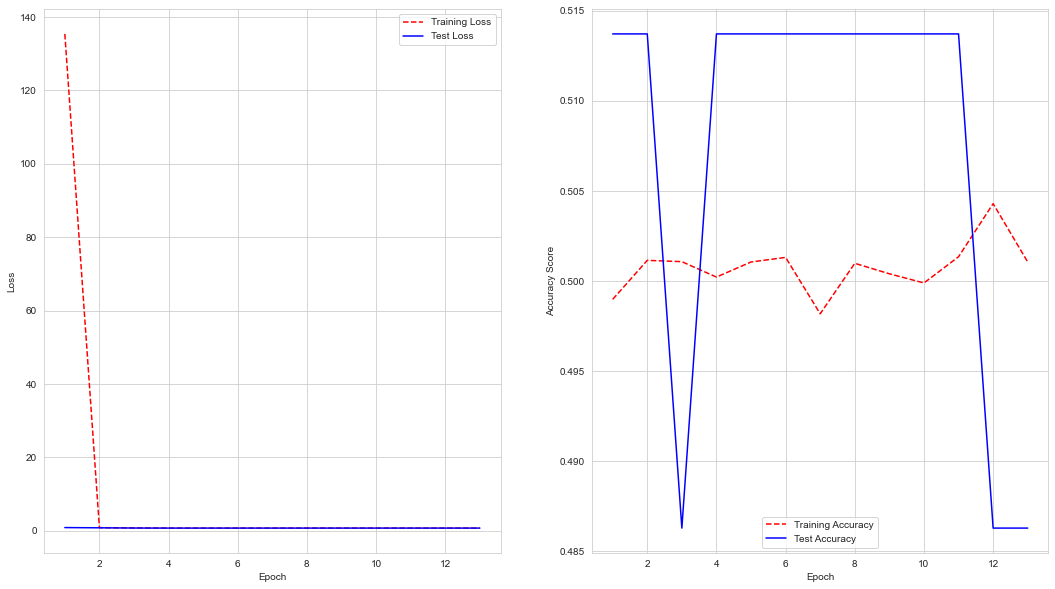

In [99]:
show_loss_acc(history_dropout_l1_small)

### L1 big

In [100]:
network_dropout_l1 = network_dropout_regularization_l1()
history_dropout_l1_big = train_with_checkpoint(network_dropout_l1, batch_size=1000)

Epoch 1/20
56/56 [==============================] - 1s 7ms/step - loss: 5133.5868 - accuracy: 0.4993 - val_loss: 3313.0894 - val_accuracy: 0.5137
Epoch 2/20
56/56 [==============================] - 0s 3ms/step - loss: 3267.4874 - accuracy: 0.4995 - val_loss: 1976.1687 - val_accuracy: 0.5137
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 2128.2549 - accuracy: 0.5041 - val_loss: 613.1893 - val_accuracy: 0.5137
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 1351.0950 - accuracy: 0.4984 - val_loss: 12.4521 - val_accuracy: 0.5137
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 914.4775 - accuracy: 0.4936 - val_loss: 5.6937 - val_accuracy: 0.4864
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 628.1681 - accuracy: 0.5008 - val_loss: 14.3925 - val_accuracy: 0.4863
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 432.7899 - accuracy: 0.4987 - val_loss: 6.2667 - val_accuracy:

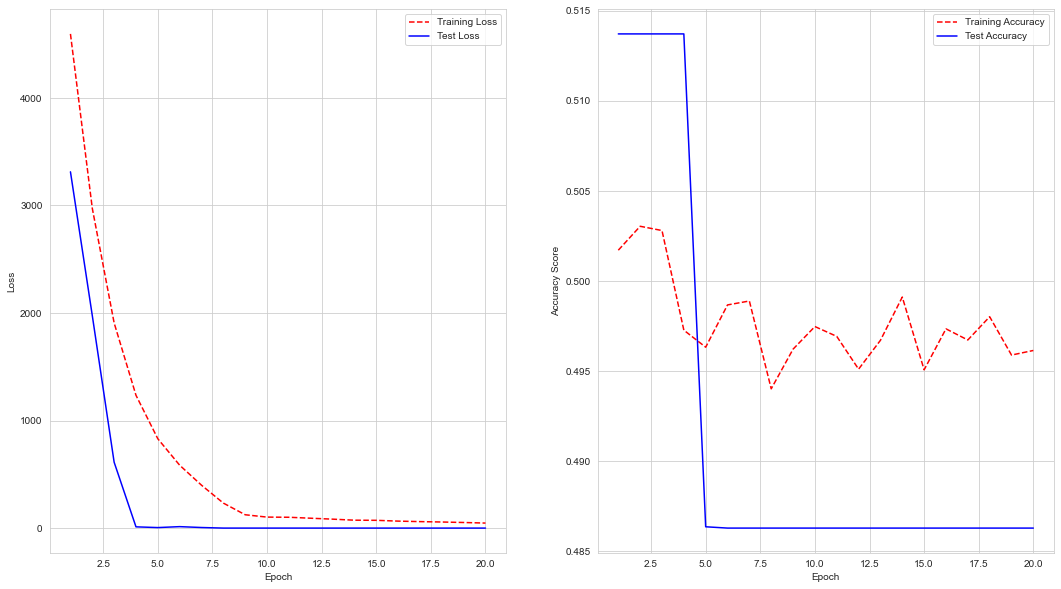

In [101]:
show_loss_acc(history_dropout_l1_big)

### Networks Cross-validation

### Base

In [105]:
network_base_cv = KerasClassifier(build_fn=create_network, epochs=10, batch_size=100, verbose=0)
score_base = cross_val_score(network_base_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_base}, mean: {score_base.mean()}')

Scores: [0.50014538 0.63332367 0.68842685 0.49883687 0.65818554 0.49905482
 0.64199507 0.6876545  0.55809218 0.50181764], mean: 0.5867532521486283


In [106]:
network_base_small_cv = KerasClassifier(build_fn=create_network, epochs=10, batch_size=10, verbose=0)
score_base_small = cross_val_score(network_base_small_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_base_small}, mean: {score_base_small.mean()}')

Scores: [0.67301542 0.51919162 0.66719979 0.71517885 0.51235825 0.50094515
 0.66249818 0.608114   0.58179438 0.50181764], mean: 0.5942113280296326


In [107]:
network_base_big_cv = KerasClassifier(build_fn=create_network, epochs=10, batch_size=1000, verbose=0)
score_base_big = cross_val_score(network_base_big_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_base_big}, mean: {score_base_big.mean()}')

Scores: [0.54696131 0.56353593 0.4886595  0.49883687 0.53053212 0.38025302
 0.49600115 0.56885272 0.61596626 0.50181764], mean: 0.5191416531801224


In [108]:
network_base_dropout_small_cv = KerasClassifier(build_fn=create_network_dropout_base, epochs=10, batch_size=10, verbose=0)
score_droput_base_small = cross_val_score(network_base_dropout_small_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_droput_base_small}, mean: {score_droput_base_small.mean()}')

Scores: [0.50014538 0.51919162 0.51410294 0.49883687 0.5        0.50094515
 0.50399882 0.50428969 0.50763416 0.50181764], mean: 0.5050962269306183


### L2

In [109]:
network_l2_cv = KerasClassifier(build_fn=network_regularization_l2, epochs=10, batch_size=100, verbose=0)
score_l2 = cross_val_score(network_l2_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_l2}, mean: {score_l2.mean()}')

Scores: [0.60220993 0.5804013  0.60119224 0.69249779 0.5        0.53162718
 0.50036353 0.60651445 0.50763416 0.50181764], mean: 0.562425822019577


In [110]:
network_l2_small_cv = KerasClassifier(build_fn=network_regularization_l2, epochs=10, batch_size=10, verbose=0)
score_l2_small = cross_val_score(network_l2_small_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_l2_small}, mean: {score_l2_small.mean()}')

Scores: [0.50014538 0.51919162 0.71096247 0.55277699 0.5        0.50094515
 0.50399882 0.50428969 0.58092189 0.70583105], mean: 0.5579063057899475


In [111]:
network_l2_big_cv = KerasClassifier(build_fn=network_regularization_l2, epochs=10, batch_size=1000, verbose=0)
score_l2_big = cross_val_score(network_l2_big_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_l2_big}, mean: {score_l2_big.mean()}')

Scores: [0.50014538 0.45943588 0.52573425 0.49927303 0.57545799 0.5250836
 0.50399882 0.59633559 0.50763416 0.66409773], mean: 0.5357196420431137


In [112]:
network_dropout_l2_small_cv = KerasClassifier(build_fn=network_dropout_regularization_l2, epochs=10, batch_size=10, verbose=0)
score_dropout_l2_small = cross_val_score(network_dropout_l2_small_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_dropout_l2_small}, mean: {score_dropout_l2_small.mean()}')

Scores: [0.50014538 0.48080838 0.51410294 0.49883687 0.5        0.50094515
 0.50399882 0.50428969 0.50763416 0.50181764], mean: 0.5012579023838043


### L1

In [113]:
network_l1_cv = KerasClassifier(build_fn=network_regularization_l1, epochs=10, batch_size=100, verbose=0)
score_l1 = cross_val_score(network_l1_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_l1}, mean: {score_l1.mean()}')

Scores: [0.50014538 0.6961326  0.70936316 0.49883687 0.55234081 0.50094515
 0.65217394 0.54151517 0.50763416 0.61465758], mean: 0.5773744821548462


In [114]:
network_l1_small_cv = KerasClassifier(build_fn=network_regularization_l1, epochs=10, batch_size=10, verbose=0)
score_l1_small = cross_val_score(network_l1_small_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_l1_small}, mean: {score_l1_small.mean()}')

Scores: [0.50014538 0.51919162 0.51410294 0.49883687 0.70936316 0.58339393
 0.50399882 0.49571034 0.69652462 0.57655954], mean: 0.5597827225923538


In [115]:
network_l1_big_cv = KerasClassifier(build_fn=network_regularization_l1, epochs=10, batch_size=1000, verbose=0)
score_l1_big = cross_val_score(network_l1_big_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_l1_big}, mean: {score_l1_big.mean()}')

Scores: [0.40186101 0.68406516 0.52224481 0.50581563 0.47135794 0.64097714
 0.49600115 0.52173913 0.4595027  0.50181764], mean: 0.5205382317304611


In [116]:
network_dropout_l1_small_cv = KerasClassifier(build_fn=network_dropout_regularization_l1, epochs=10, batch_size=10, verbose=0)
score_dropout_l1_small = cross_val_score(network_dropout_l1_small_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_dropout_l1_small}, mean: {score_dropout_l1_small.mean()}')

Scores: [0.50014538 0.51919162 0.51410294 0.49883687 0.5        0.50094515
 0.50399882 0.50428969 0.49236587 0.50181764], mean: 0.5035693973302842


### Score comparison

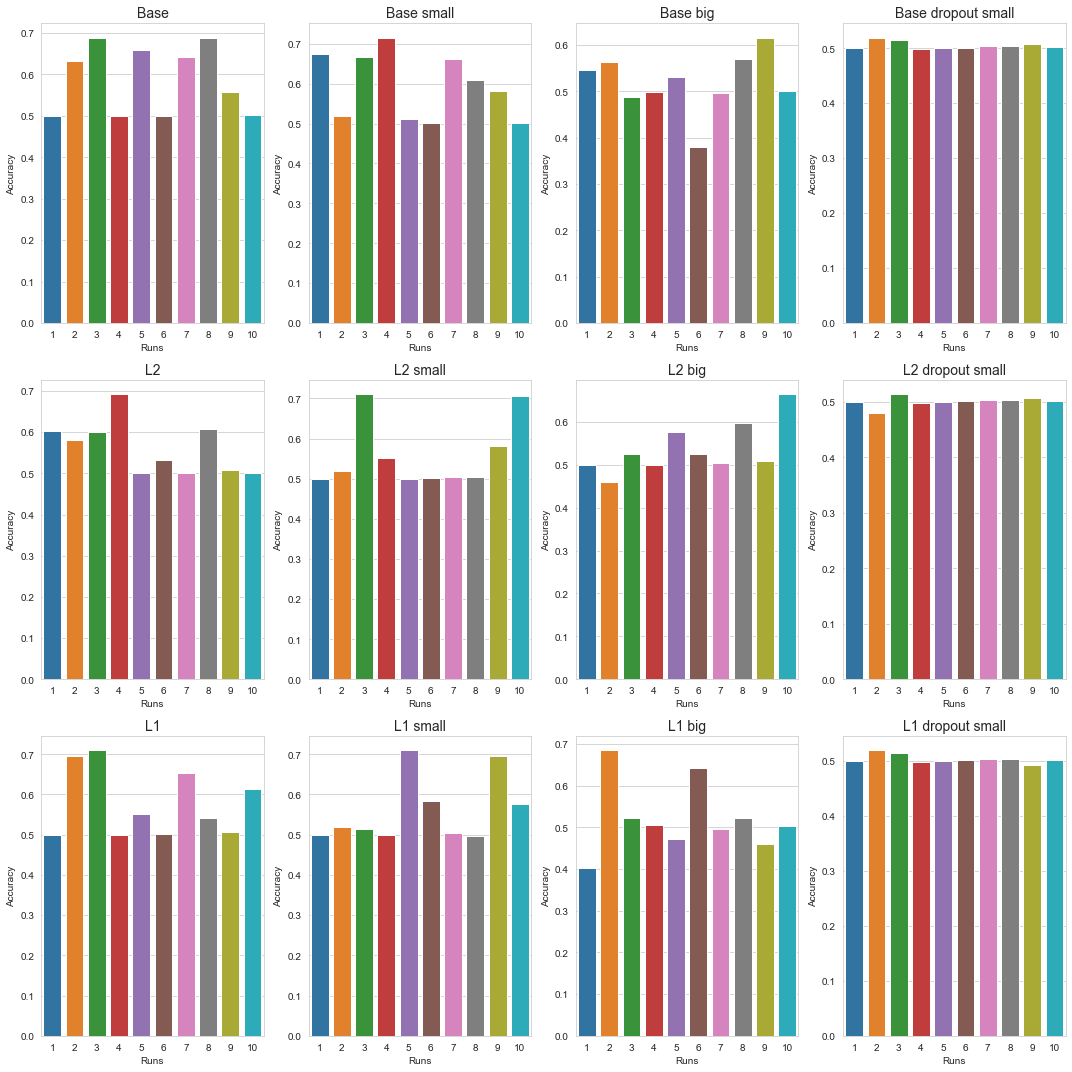

In [119]:
scores = [score_base, score_base_small, score_base_big, score_droput_base_small,
          score_l2, score_l2_small, score_l2_big, score_dropout_l2_small,
          score_l1, score_l1_small, score_l1_big, score_dropout_l1_small]

scores_max = [np.amax(score_base), np.amax(score_base_small), np.amax(score_base_big), np.amax(score_droput_base_small),
              np.amax(score_l2), np.amax(score_l2_small), np.amax(score_l2_big), np.amax(score_dropout_l2_small),
              np.amax(score_l1), np.amax(score_l1_small), np.amax(score_l1_big), np.amax(score_dropout_l1_small)]

means = [np.mean(score_base), np.mean(score_base_small), np.mean(score_base_big), np.mean(score_droput_base_small),
         np.mean(score_l2), np.mean(score_l2_small), np.mean(score_l2_big), np.mean(score_dropout_l2_small),
         np.mean(score_l1), np.mean(score_l1_small), np.mean(score_l1_big), np.mean(score_dropout_l1_small)]

labels = ['Base', 'Base small', 'Base big', 'Base dropout small',
         'L2', 'L2 small', 'L2 big', 'L2 dropout small',
         'L1', 'L1 small', 'L1 big', 'L1 dropout small']

d = {'Labels': labels, 'Scores max': scores_max, 'Means': means}
data_scores = pd.DataFrame(data=d)
runs = np.r_[1:11]

sns.set_style('whitegrid')
fig1, axs1 = plt.subplots(3, 4, figsize=(15, 15), num='Scores visualized')  # 3x4
plt.title('Scores')

for i in range(0, 3):
    for j in range(0, 4):
        axs1[i, j].set_title(labels[i*4+j], fontsize=14)
        axs1[i, j].set_xlabel('Runs')
        axs1[i, j].set_ylabel('Accuracy')
        sns.barplot(ax=axs1[i, j], x=runs, y=scores[i*4+j])

plt.tight_layout()

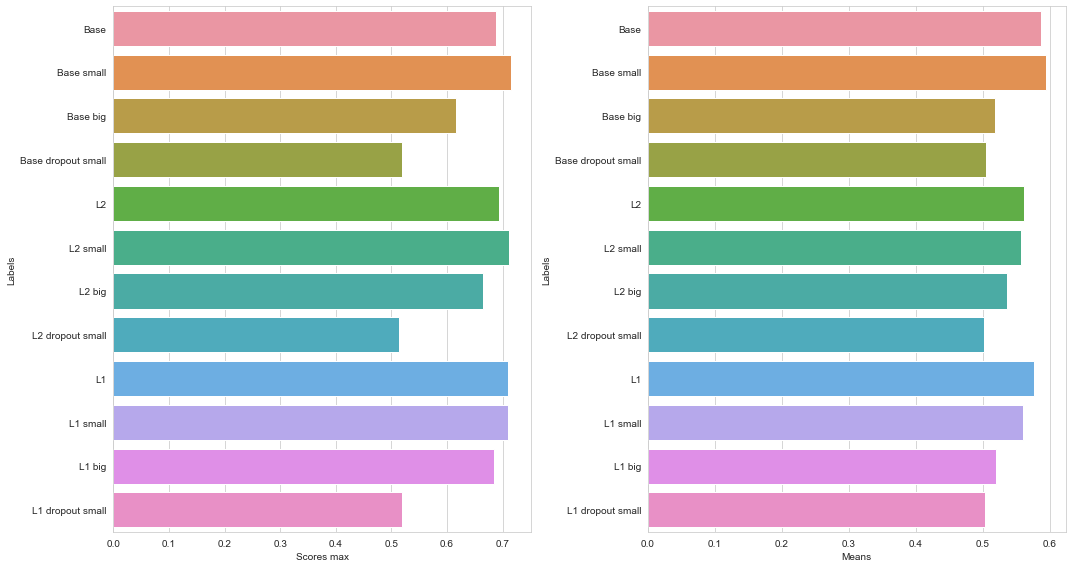

In [120]:
fig2, axs2 = plt.subplots(1, 2, figsize=(15, 8), num='Scores visualized')
sns.barplot(ax=axs2[0], data=data_scores, x='Scores max', y='Labels')
sns.barplot(ax=axs2[1], data=data_scores, x='Means', y='Labels')
plt.tight_layout()

## Tuning

In [2]:
# def network_tune(optimizer='adam', init_mode='uniform', weight_constraint=0, neurons=6):
#     network = models.Sequential()
#     network.add(layers.Dense(units=neurons, activation="relu", kernel_initializer=init_mode, input_shape=(11,), kernel_constraint=maxnorm(weight_constraint)))
#     network.add(layers.Dense(units=neurons, activation="relu", kernel_initializer=init_mode))
#     network.add(layers.Dense(units=1, activation="sigmoid", kernel_initializer=init_mode))

#     network.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#     return network

# neural_network_tuninig = KerasClassifier(build_fn=network_tune, verbose=1)

# epochs = [5, 10, 20]
# batches = [10, 50, 100, 1000]
# optimizers = ["rmsprop", "adam", "sgd"]  # , "adadelta", "adagrad", "adamax", "nadam", "ftrl"
# # learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# # momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# # activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# weight_constraint = [1, 2, 3, 4, 5]
# # dropout_rate = [0.0, 0.1, 0.2, 0.5, 0.8, 0.9]
# neurons = [1, 5, 10, 20, 50]

# start = time.time()
# hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init_mode=init_mode,
#                        weight_constraint=weight_constraint, neurons=neurons)
# grid = GridSearchCV(estimator=neural_network_tuninig, param_grid=hyperparameters, n_jobs=-1)
# grid_result = grid.fit(x, y)
# end = time.time()
# print(f'Best params: {grid_result.best_params_}, best score: {grid_result.best_score_}, took {end - start} seconds.')

### Custom networks

In [133]:
def run_test(network):
    callbacks = [EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
                 ModelCheckpoint(filepath="best_model.h5", monitor="val_accuracy", save_best_only=True)]
    
    estimator = KerasClassifier(build_fn=network, epochs=20, batch_size=10, verbose=1)
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    results = cross_val_score(estimator, x, y, cv=kfold, fit_params={'callbacks': callbacks}, n_jobs=-1)
    print(f'Scores: {results}, mean: {results.mean()}\n')
    
    return results

def network_11_6_1():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network
    
def network_11_12_1():
    network = models.Sequential()
    network.add(layers.Dense(units=12, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network

def network_11_6_3_1():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=3, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network

def network_11_6_4_2_1():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=4, activation="relu"))
    network.add(layers.Dense(units=2, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network

def network_11_12_6_1():
    network = models.Sequential()
    network.add(layers.Dense(units=12, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=6, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network

def network_11_12_6_3_1():
    network = models.Sequential()
    network.add(layers.Dense(units=12, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=6, activation="relu"))
    network.add(layers.Dense(units=3, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network

In [134]:
start = time.time()
res_11_6_1 = run_test(network_11_6_1)
res_11_12_1 = run_test(network_11_12_1)
res_11_6_3_1 = run_test(network_11_6_3_1)
res_11_6_4_2_1 = run_test(network_11_6_4_2_1)
res_11_12_6_1 = run_test(network_11_12_6_1)
res_11_12_6_3_1 = run_test(network_11_12_6_3_1)
end = time.time()
print(f'Training took {end - start} seconds.')

Scores: [0.70500147 0.59784824 0.53024137 0.70718235 0.66836292 0.50050896
 0.63021666 0.7030682  0.70873928 0.50734329], mean: 0.6258512735366821

Scores: [0.64146554 0.49709219 0.68799067 0.71314335 0.49767375 0.52726477
 0.65784502 0.5887742  0.64577579 0.71441036], mean: 0.6171435654163361

Scores: [0.50930506 0.50290781 0.510032   0.49985459 0.56062812 0.50559837
 0.49251127 0.73026031 0.50516212 0.55576557], mean: 0.5372025221586227

Scores: [0.50930506 0.5783658  0.510032   0.49985459 0.49549288 0.49440163
 0.49251127 0.48974845 0.49134797 0.50734329], mean: 0.5068402945995331

Scores: [0.50930506 0.50290781 0.70558304 0.57851118 0.70383835 0.6531918
 0.49251127 0.48974845 0.50865203 0.50734329], mean: 0.5651592284440994

Scores: [0.50930506 0.50290781 0.510032   0.49985459 0.50450712 0.50559837
 0.49251127 0.51025158 0.50865203 0.50734329], mean: 0.5050963133573532

Training took 912.2034978866577 seconds.


### Score comparison

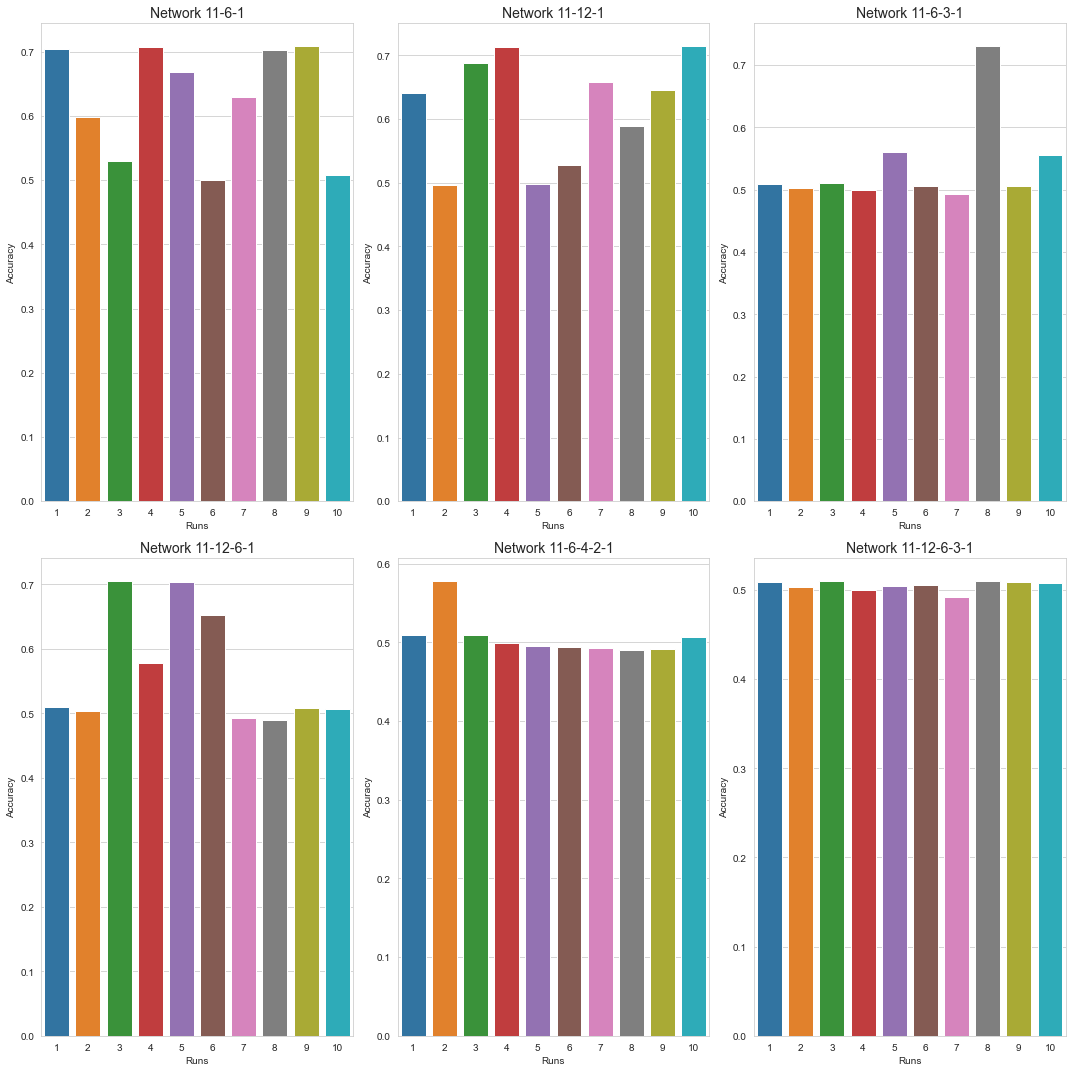

In [152]:
scores_2 = [res_11_6_1, res_11_12_1, res_11_6_3_1, res_11_12_6_1, res_11_6_4_2_1, res_11_12_6_3_1]

scores_max_2 = [np.amax(res_11_6_1), np.amax(res_11_12_1), np.amax(res_11_6_3_1), np.amax(res_11_12_6_1),
                np.amax(res_11_6_4_2_1), np.amax(res_11_12_6_3_1)]

means_2 = [np.mean(res_11_6_1), np.mean(res_11_12_1), np.mean(res_11_6_3_1), np.mean(res_11_12_6_1),
           np.mean(res_11_6_4_2_1), np.mean(res_11_12_6_3_1)]

labels_2 = ['Network 11-6-1', 'Network 11-12-1', 'Network 11-6-3-1', 'Network 11-12-6-1',
            'Network 11-6-4-2-1', 'Network 11-12-6-3-1']

d_2 = {'Labels': labels_2, 'Scores max': scores_max_2, 'Means': means_2}
data_scores_2 = pd.DataFrame(data=d_2)
runs = np.r_[1:11]

sns.set_style('whitegrid')
fig3, axs3 = plt.subplots(2, 3, figsize=(15, 15), num='Scores visualized')
plt.title('Scores')

for i in range(0, 2):
    for j in range(0, 3):
        axs3[i, j].set_title(labels_2[i*3+j], fontsize=14)
        axs3[i, j].set_xlabel('Runs')
        axs3[i, j].set_ylabel('Accuracy')
        sns.barplot(ax=axs3[i, j], x=runs, y=scores_2[i*3+j])

plt.tight_layout()

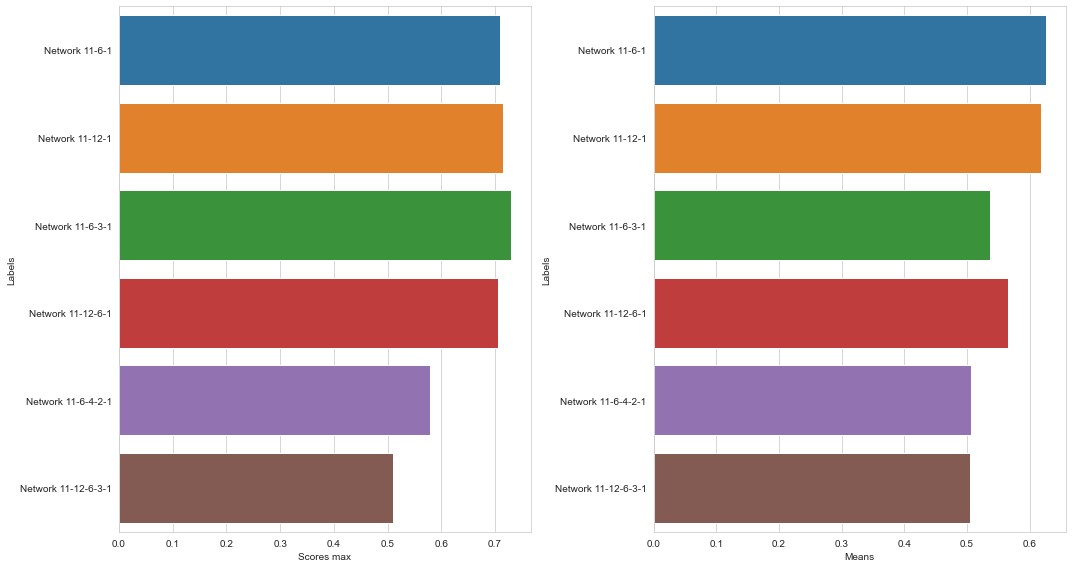

In [153]:
fig4, axs4 = plt.subplots(1, 2, figsize=(15, 8), num='Scores visualized')
sns.barplot(ax=axs4[0], data=data_scores_2, x='Scores max', y='Labels')
sns.barplot(ax=axs4[1], data=data_scores_2, x='Means', y='Labels')
plt.tight_layout()

In [155]:
# import tensorflow as tf

# def my_loss_fn(y_true, y_pred):
#     squared_difference = tf.square(y_true * tf.math.log(y_true / y_pred))
#     return tf.reduce_mean(squared_difference, axis=-1)

# def network_loss():
#     network = models.Sequential()
#     network.add(layers.Dense(units=6, activation="relu", input_shape=(11,)))
#     network.add(layers.Dense(units=1, activation="sigmoid"))
    
#     network.compile(loss=my_loss_fn, optimizer="adam", metrics=["accuracy"])
    
#     return network

# result_loss = run_test(network_loss)

In [20]:
network_mega = models.Sequential()
network_mega.add(layers.Dense(units=128, activation="relu", input_shape=(11,)))
network_mega.add(layers.Dense(units=64, activation="relu"))
network_mega.add(layers.Dense(units=1, activation="sigmoid"))

network_mega.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history_mega = network_mega.fit(x_train, y_train, epochs=100, verbose=1, batch_size=100,
                      validation_data=(x_test, y_test))

Epoch 1/100
551/551 [==============================] - 1s 1ms/step - loss: 128.7357 - accuracy: 0.4966 - val_loss: 39.7093 - val_accuracy: 0.4963
Epoch 2/100
551/551 [==============================] - 1s 989us/step - loss: 33.3277 - accuracy: 0.5016 - val_loss: 61.2303 - val_accuracy: 0.4963
Epoch 3/100
551/551 [==============================] - 1s 958us/step - loss: 25.9778 - accuracy: 0.5018 - val_loss: 27.1531 - val_accuracy: 0.5037
Epoch 4/100
551/551 [==============================] - 1s 1ms/step - loss: 25.8577 - accuracy: 0.5096 - val_loss: 41.1413 - val_accuracy: 0.4963
Epoch 5/100
551/551 [==============================] - 1s 973us/step - loss: 18.7537 - accuracy: 0.5122 - val_loss: 17.0788 - val_accuracy: 0.4963
Epoch 6/100
551/551 [==============================] - 1s 953us/step - loss: 12.9373 - accuracy: 0.5221 - val_loss: 10.6787 - val_accuracy: 0.4963
Epoch 7/100
551/551 [==============================] - 1s 980us/step - loss: 12.0319 - accuracy: 0.5292 - val_loss: 26.56

551/551 [==============================] - 1s 937us/step - loss: 0.7537 - accuracy: 0.6292 - val_loss: 0.6603 - val_accuracy: 0.6289
Epoch 58/100
551/551 [==============================] - 1s 933us/step - loss: 0.6651 - accuracy: 0.6618 - val_loss: 0.5822 - val_accuracy: 0.7057
Epoch 59/100
551/551 [==============================] - 1s 938us/step - loss: 0.6734 - accuracy: 0.6417 - val_loss: 0.5952 - val_accuracy: 0.6864
Epoch 60/100
551/551 [==============================] - 1s 944us/step - loss: 0.6872 - accuracy: 0.6357 - val_loss: 0.7328 - val_accuracy: 0.5897
Epoch 61/100
551/551 [==============================] - 1s 942us/step - loss: 0.6544 - accuracy: 0.6503 - val_loss: 0.7187 - val_accuracy: 0.5779
Epoch 62/100
551/551 [==============================] - 1s 931us/step - loss: 0.6562 - accuracy: 0.6506 - val_loss: 0.9673 - val_accuracy: 0.5112
Epoch 63/100
551/551 [==============================] - 1s 955us/step - loss: 0.6562 - accuracy: 0.6470 - val_loss: 0.5819 - val_accuracy

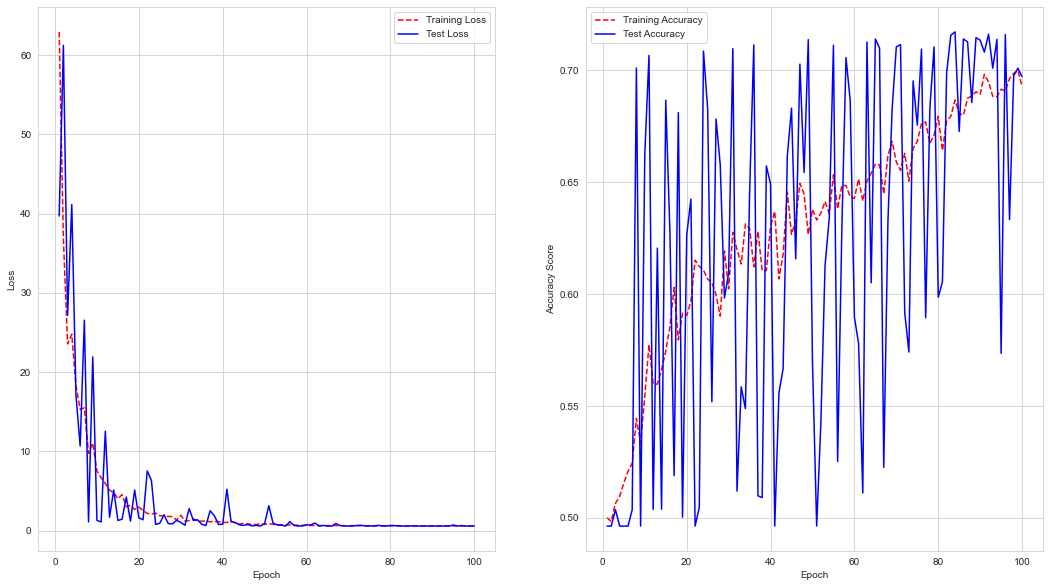

In [25]:
show_loss_acc(history_mega)